In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.pyplot import rc_context
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=100, dpi_save=1000)
sc.logging.print_header()

2023-05-21 12:52:04.147384: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/R/lib:/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/java-8-openjdk-amd64/jre/lib/amd64/server
2023-05-21 12:52:04.147460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.21.1 scipy==1.8.1 pandas==1.3.1 scikit-learn==0.24.2 statsmodels==0.13.2 python-igraph==0.9.6 pynndescent==0.5.4


In [3]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy==1.21.1
pandas==1.3.1
scanpy==1.8.1
seaborn==0.11.1
scipy==1.8.1
anndata==0.7.6
matplotlib==3.4.2


In [4]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [5]:
root_path = '/lustre/scratch126/cellgen/team298/hg6/Fetal_skin/data/final/'
save_path = '/home/jovyan/projects/skin/fetal_skin/'
sc.settings.figdir = save_path + 'figures/other plots/'

# Plot umap of myeloid cells

In [8]:
#load data object: myeloid data object with umap embedding from harmony integration

myeloid_object = 'fetal_skin.myeloid.cellxgene.20220202.h5ad'
myeloid_path = root_path + myeloid_object
myedata = sc.read(myeloid_path)

Only considering the two last: ['.20220202', '.h5ad'].
Only considering the two last: ['.20220202', '.h5ad'].


In [9]:
myedata

AnnData object with n_obs × n_vars = 35151 × 28885
    obs: 'sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'joint_annotation_20220202', 'independent_annotation_refined_20220202', 'fig1b_annotation_20220202', 'fig1b_annotation_v2'
   

In [10]:
print(list(myedata.obs['joint_annotation_20220202'].unique()))

['LYVE1++ macrophage', 'Monocyte (activated/differentiating)', 'DC2', 'TREM2+ macrophage', 'Monocyte precursor', 'Monocyte', 'Iron-recycling macrophage', 'Inflammatory DC', 'MHCII+ macrophage', 'DC1', 'Neutrophil2', 'LC', 'Neutrophil1', 'ASDC']


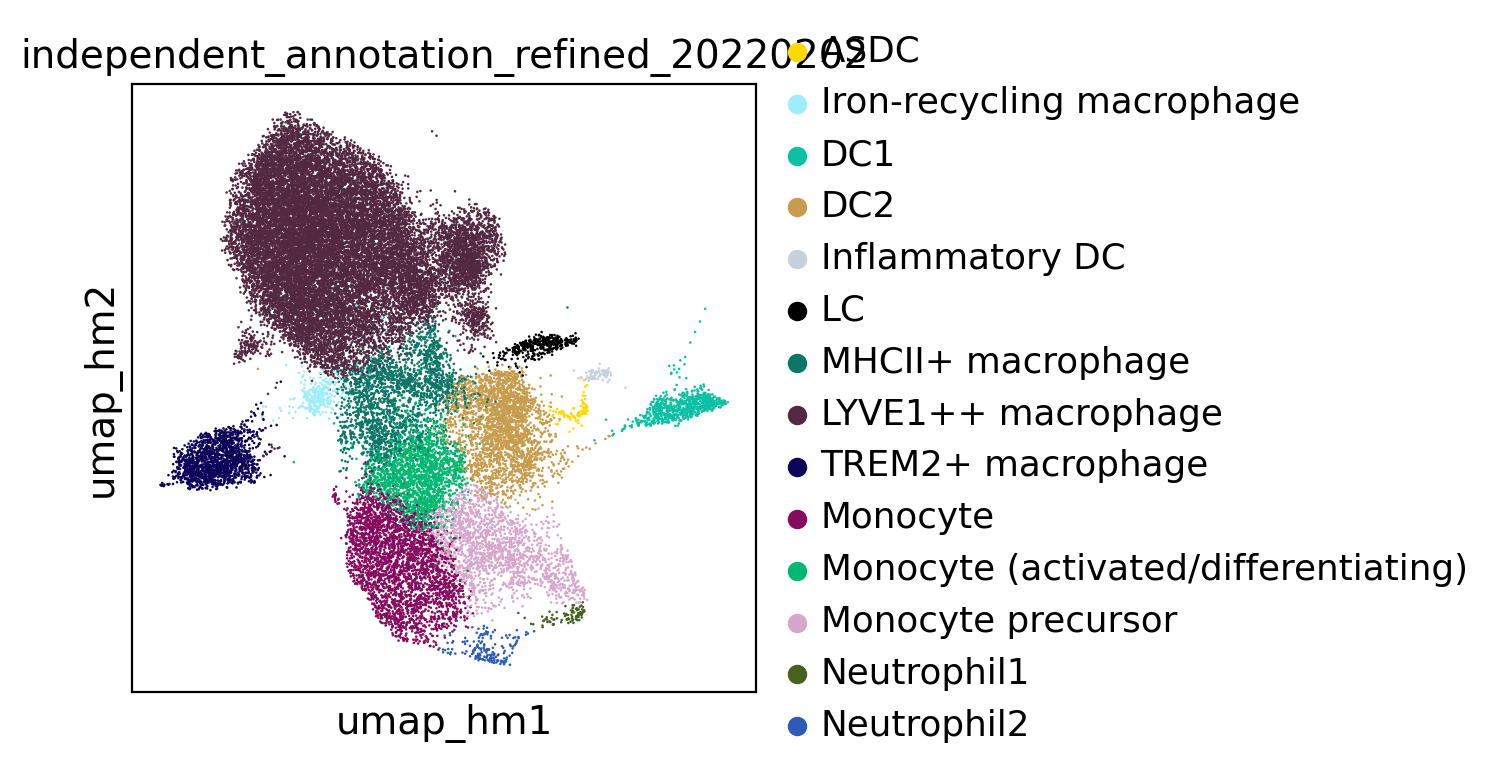

In [12]:
sc.pl.embedding(myedata, basis="umap_hm", color="independent_annotation_refined_20220202", 
                palette={'ASDC' : '#ffd900',
                         "Iron-recycling macrophage": '#9eedfa',
                         'DC1' : '#0cc0a4',
                         'DC2' : '#c79c4d',
                         'Inflammatory DC' : '#c4d1de',
                         'LC' : '#000000',
                         'MHCII+ macrophage' : '#0c7767',
                         'LYVE1++ macrophage' : '#532942',
                         'TREM2+ macrophage' : '#0c0459',
                         'Monocyte' : '#860a5e',
                         'Monocyte (activated/differentiating)' : '#00b870',
                         'Monocyte precursor' : '#d6a6cc',
                         'Neutrophil1' : '#45621f',
                         'Neutrophil2' : '#2f5bb8'
                        })

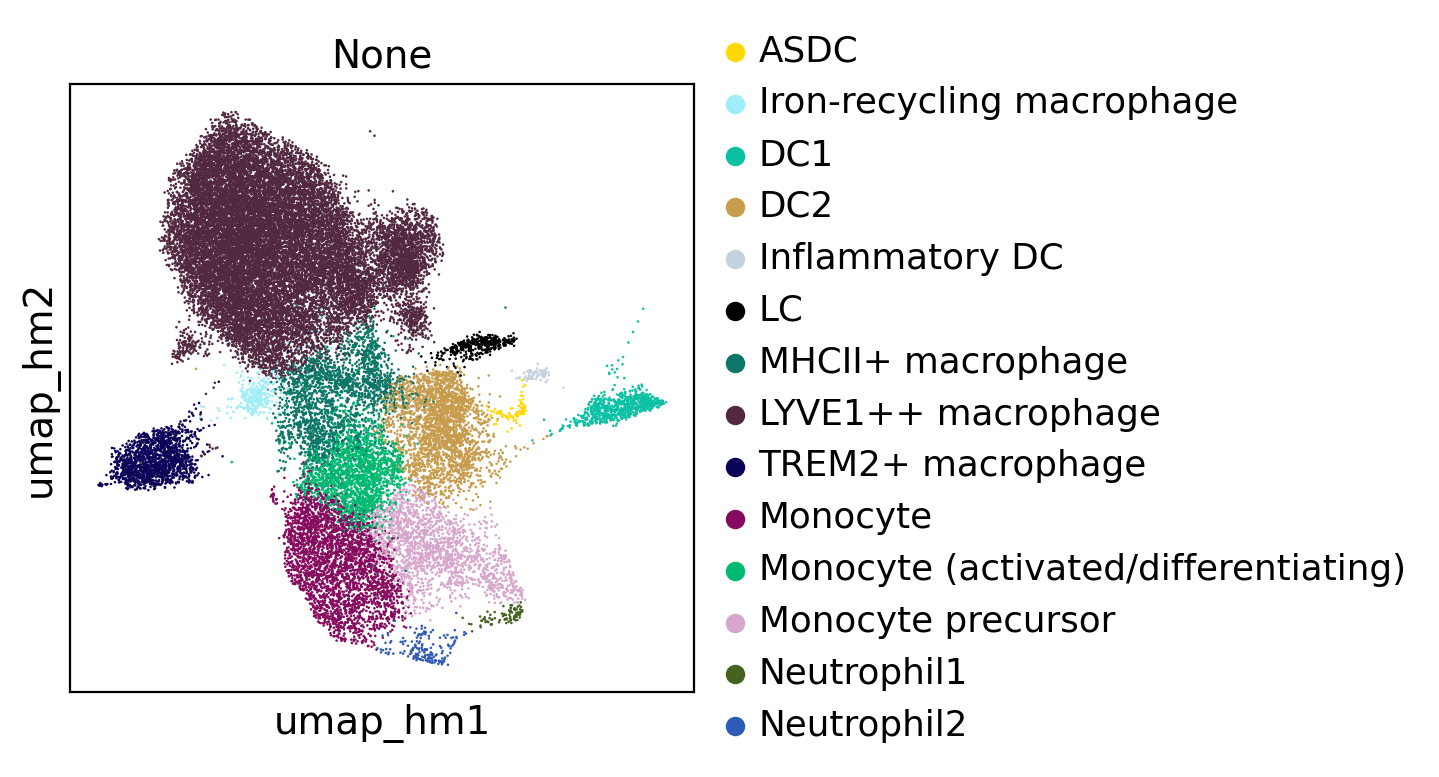

In [13]:
sc.pl.embedding(myedata, basis="umap_hm", color="independent_annotation_refined_20220202", title='None',
                palette={'ASDC' : '#ffd900',
                         "Iron-recycling macrophage": '#9eedfa',
                         'DC1' : '#0cc0a4',
                         'DC2' : '#c79c4d',
                         'Inflammatory DC' : '#c4d1de',
                         'LC' : '#000000',
                         'MHCII+ macrophage' : '#0c7767',
                         'LYVE1++ macrophage' : '#532942',
                         'TREM2+ macrophage' : '#0c0459',
                         'Monocyte' : '#860a5e',
                         'Monocyte (activated/differentiating)' : '#00b870',
                         'Monocyte precursor' : '#d6a6cc',
                         'Neutrophil1' : '#45621f',
                         'Neutrophil2' : '#2f5bb8'
                        })
#save='umap_myeloid.pdf')

# Plot macrophage markers

In [15]:
#load data object: prenatal skin data object, post qc with all celltypes
#above myeloid object can also be used

fskin_object = 'fetal_skin.norm.maternal_removed.20220202.h5ad'
fskin_path = root_path + fskin_object
adata = sc.read(fskin_path)

Only considering the two last: ['.20220202', '.h5ad'].
Only considering the two last: ['.20220202', '.h5ad'].


In [16]:
#slice adata to keep only macrophages

mac = ['Iron-recycling macrophage', 'LYVE1++ macrophage', 'MHCII+ macrophage', 'TREM2+ macrophage']
adata_mac = adata[adata.obs['joint_annotation_20220202'].isin(mac)]

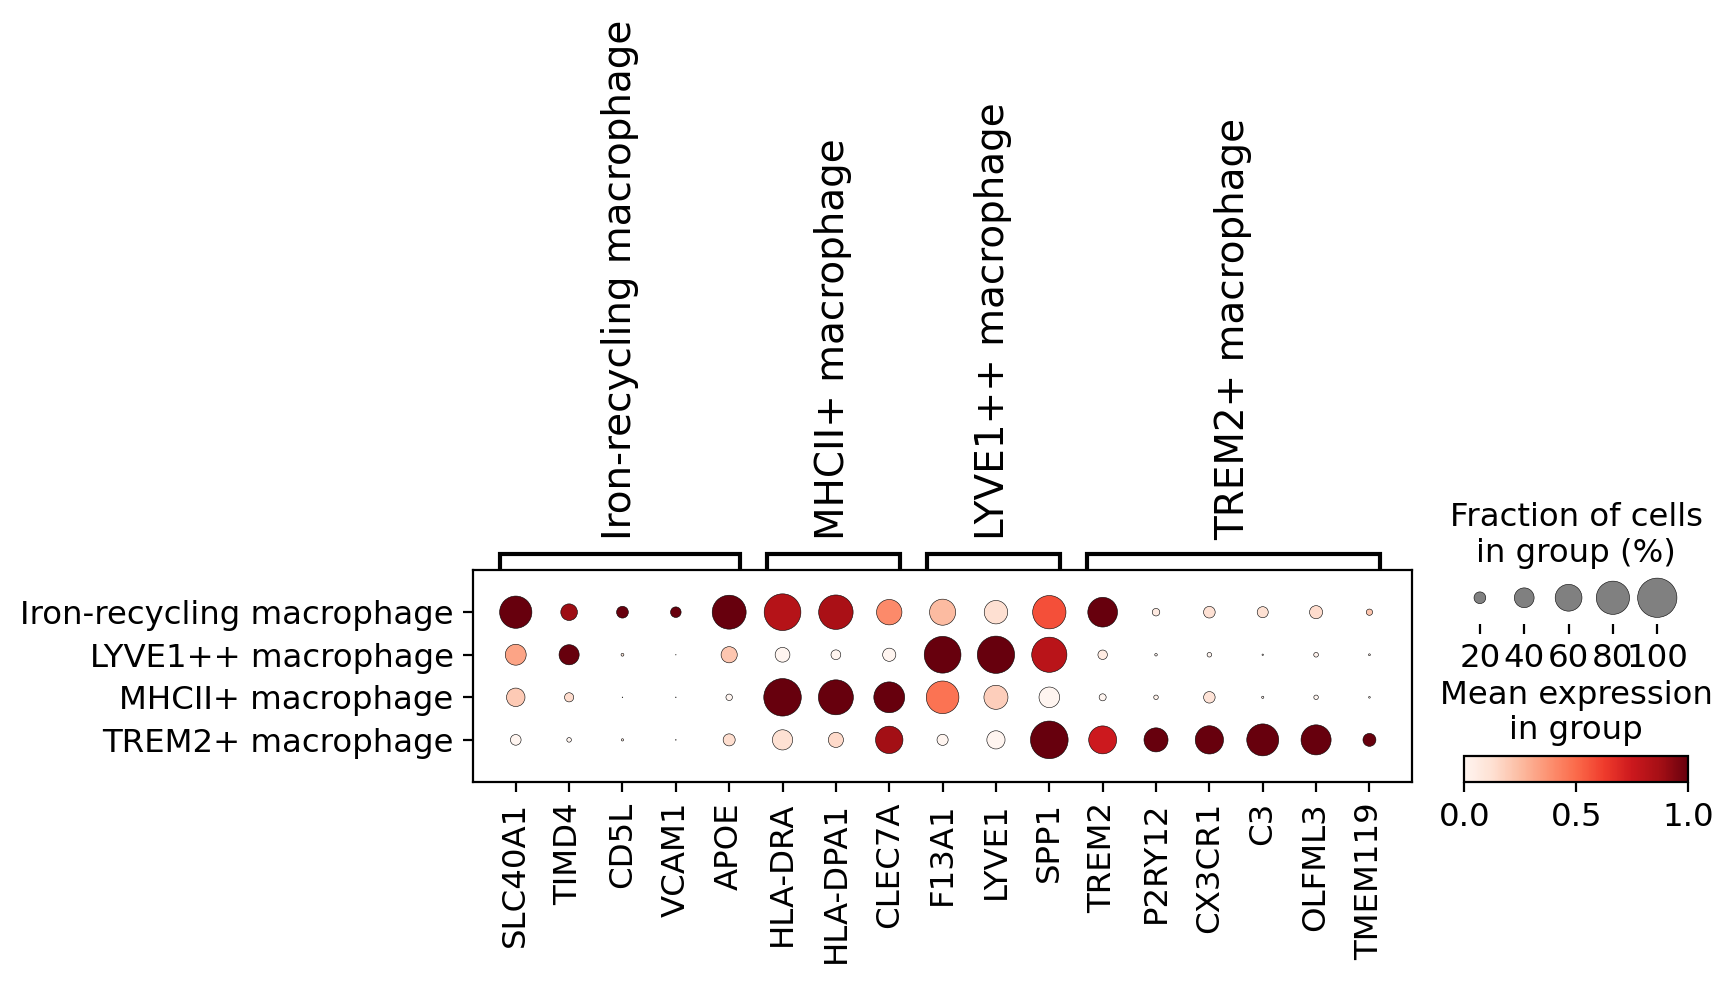

In [17]:
#Plot markers from literature from below atlases to demonstrate microglia-like profile of TREM2+ macrophages
#Suo, Dann et al: pan-fetal immune,
#Garcia-Alonso et al: human gonads
#Bian et al: fetal brain)

macrophage_markers = {'Iron-recycling macrophage' : ['SLC40A1', 'TIMD4', 'CD5L', 'VCAM1', 'APOE'],
                      'MHCII+ macrophage' : ['HLA-DRA', 'HLA-DPA1', 'CLEC7A'],
                      'LYVE1++ macrophage' : ['F13A1', 'LYVE1', 'SPP1'],
                      'TREM2+ macrophage' : ['TREM2', 'P2RY12', 'CX3CR1', 'C3', 'OLFML3', 'TMEM119']}

sc.pl.dotplot(adata_mac, macrophage_markers, groupby='joint_annotation_20220202', standard_scale='var')

#sc.pl.dotplot(adata_mac, macrophage_markers, groupby='joint_annotation_20220202', standard_scale='var', 
#              return_fig=True).savefig('/home/jovyan/projects/skin/fetal_skin/figures/marker_panels/TREM2_markers_all_11072022.pdf')

# GSEApy analysis - macrophages

In [18]:
adata_mac

View of AnnData object with n_obs × n_vars = 24392 × 28885
    obs: 'sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'fig1b_annotation_20220202', 'joint_annotation_20220202', 'fig1b_annotation_v2', 'independent_annotation_refined_20220

In [19]:
# compute DEGs between macrophages only
sc.pp.highly_variable_genes(adata_mac)

extracting highly variable genes
    finished (0:00:02)


Trying to set attribute `.uns` of view, copying.


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [20]:
sc.tl.rank_genes_groups(adata_mac, 'joint_annotation_20220202', method='wilcoxon', key_added='rank_genes_groups_mac')

ranking genes
    finished: added to `.uns['rank_genes_groups_mac']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:47)


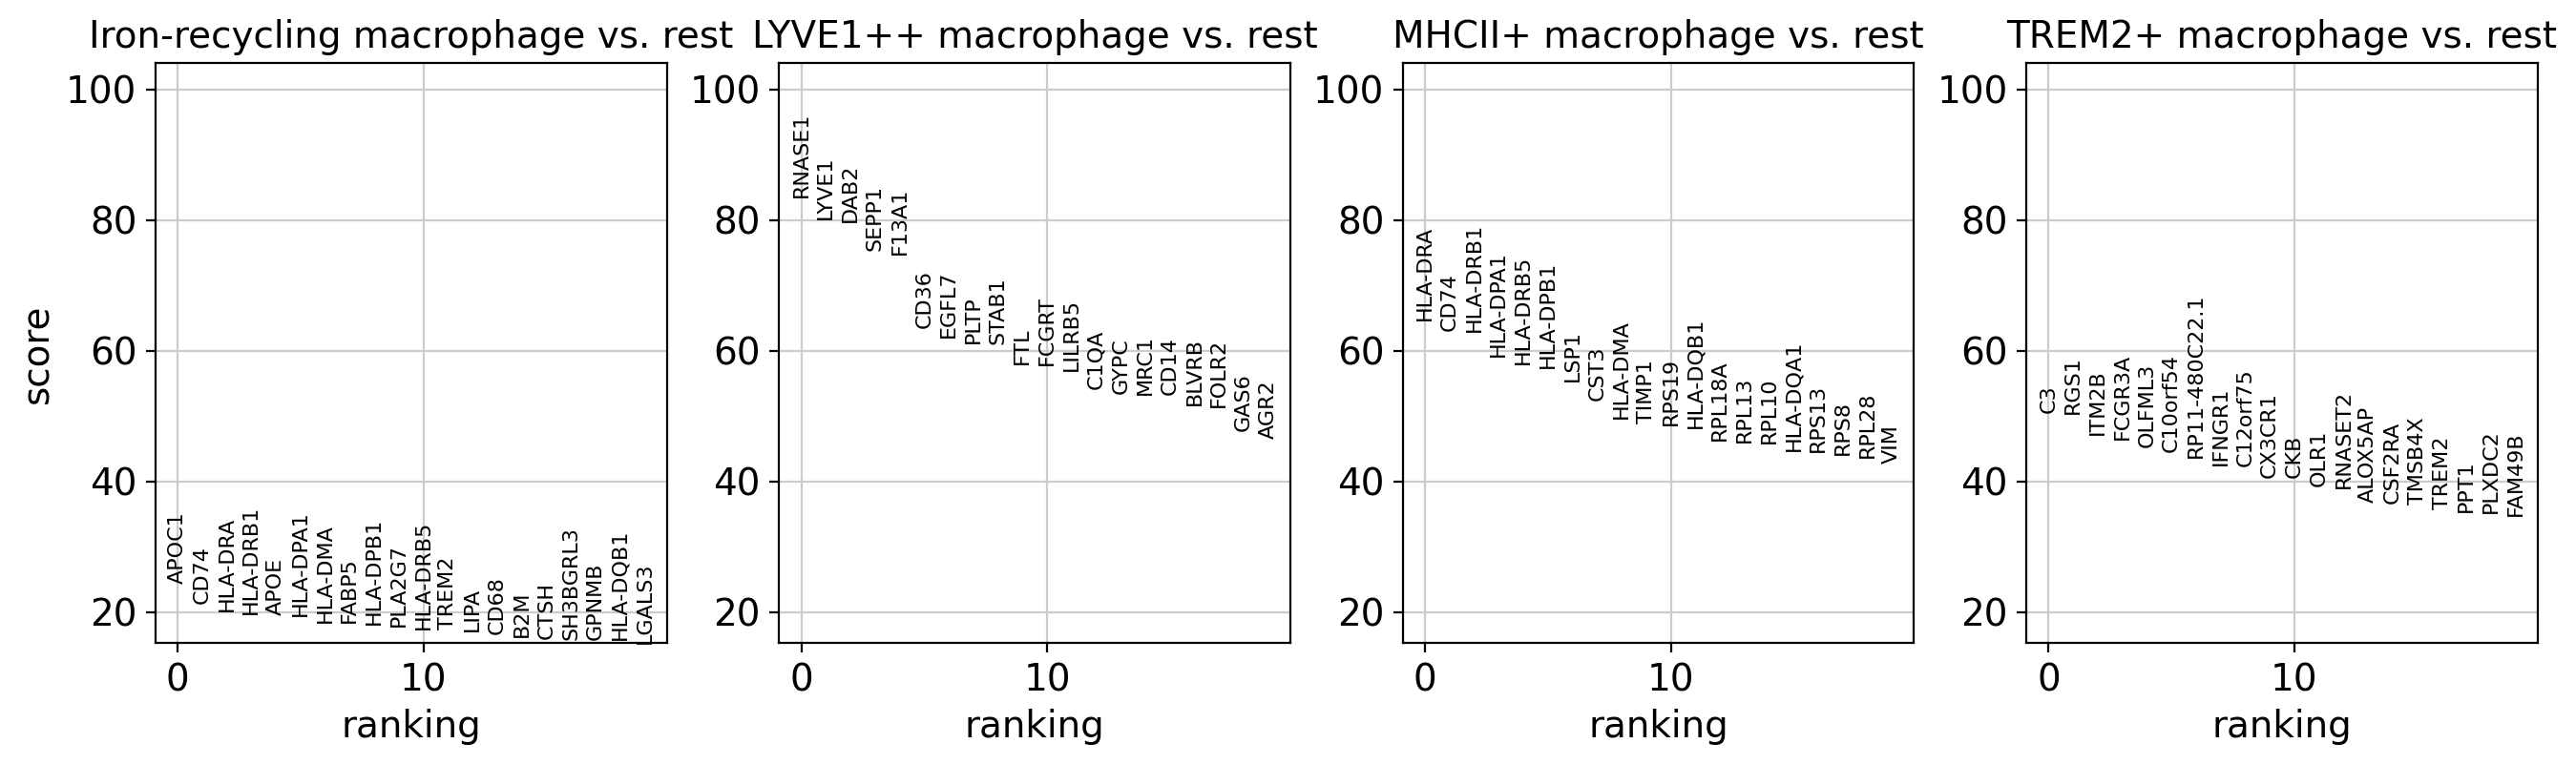

In [21]:
sc.pl.rank_genes_groups(adata_mac, key='rank_genes_groups_mac')

In [22]:
#get list of significant genes for each macrophage to be used in GSEApy analysis
genes_TREM2mac = sc.get.rank_genes_groups_df(adata_mac, group='TREM2+ macrophage', 
                                    key='rank_genes_groups_mac', log2fc_min=2.00, 
                                    pval_cutoff=0.01)
glist_TREM2mac = genes_TREM2mac['names'].squeeze().str.strip().tolist()
print(len(glist_TREM2mac))

183


In [23]:
genes_LYVE1mac = sc.get.rank_genes_groups_df(adata_mac, group='LYVE1++ macrophage', 
                                    key='rank_genes_groups_mac', log2fc_min=2.00, 
                                    pval_cutoff=0.01)
glist_LYVE1mac = genes_LYVE1mac['names'].squeeze().str.strip().tolist()
print(len(glist_LYVE1mac))

96


In [24]:
genes_Ironmac = sc.get.rank_genes_groups_df(adata_mac, group='Iron-recycling macrophage', 
                                    key='rank_genes_groups_mac', log2fc_min=2.00, 
                                    pval_cutoff=0.01)
glist_Ironmac = genes_Ironmac['names'].squeeze().str.strip().tolist()
print(len(glist_Ironmac))

66


In [25]:
genes_MHC2mac = sc.get.rank_genes_groups_df(adata_mac, group='MHCII+ macrophage', 
                                    key='rank_genes_groups_mac', log2fc_min=2.00, 
                                    pval_cutoff=0.01)
glist_MHC2mac = genes_MHC2mac['names'].squeeze().str.strip().tolist()
print(len(glist_MHC2mac))

149


In [17]:
#save genes lists used as input for GSEApy analysis as csv
genes_TREM2mac.to_csv('/home/jovyan/projects/skin/fetal_skin/GSEA_mac/DEGs/TREM2mac_logfc2p001.csv')
genes_LYVE1mac.to_csv('/home/jovyan/projects/skin/fetal_skin/GSEA_mac/DEGs/LYVE1mac_logfc2p001.csv')
genes_Ironmac.to_csv('/home/jovyan/projects/skin/fetal_skin/GSEA_mac/DEGs/Ironmac_logfc2p001.csv')
genes_MHC2mac.to_csv('/home/jovyan/projects/skin/fetal_skin/GSEA_mac/DEGs/MHC2mac_logfc2p001.csv')

In [26]:
import gseapy as gp
from gseapy.plot import barplot, dotplot

In [27]:
enr_TREM2mac = gp.enrichr(gene_list=glist_TREM2mac,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='Human',
                 description='gseaTREM2',
                 outdir='/home/jovyan/projects/skin/fetal_skin/GSEA_mac/15042022/enrichr_TREM2_210523',
                 no_plot=True,
                 cutoff=0.05)
enr_TREM2mac.results.head(10)

Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   
5  GO_Biological_Process_2021   
6  GO_Biological_Process_2021   
7  GO_Biological_Process_2021   
8  GO_Biological_Process_2021   
9  GO_Biological_Process_2021   

                                                Term Overlap       P-value  \
0  regulation of microglial cell migration (GO:19...     4/7  2.323495e-07   
1  positive regulation of multicellular organisma...  14/345  3.741295e-06   
2   cytokine-mediated signaling pathway (GO:0019221)  19/621  4.483834e-06   
3  positive regulation of microglial cell migrati...     3/6  1.476925e-05   
4          regulation of cell migration (GO:0030334)  14/408  2.476618e-05   
5    regulation of chemokine production (GO:0032642)    5/42  3.925166e-05   
6  positive regulation of glial cell migration (G...     3/8  4.079864e-05   
7                       synapse pruning (GO:0098883)     3/9  6.078589e-05   
8    regulation of macrophage migration (GO:1905521)    3/10  8.625247e-05   
9  regulation of catecholamine secretion (GO:0050...    4/30  1.543155e-04   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.000360            0                     0  147.590317   
1          0.002318            0                     0    4.876812   
2          0.002318            0                     0    3.697887   
3          0.005727            0                     0  110.077778   
4          0.007682            0                     0    4.083771   
5          0.009040            0                     0   15.016702   
6          0.009040            0                     0   66.040000   
7          0.011785            0                     0   55.030556   
8          0.014864            0                     0   47.166667   
9          0.023934            0                     0   17.009884   

   Combined Score                                              Genes  
0     2254.445512                           CX3CR1;P2RY12;CSF1;TREM2  
1       60.941030  PTGER4;WNT5A;TREM2;INHBA;CLEC9A;SORL1;GADD45G;...  
2       45.539598  PLVAP;CSF3R;CSF1;TNFRSF12A;IFNGR1;MMP2;FPR1;TN...  
3     1224.391082                                  P2RY12;CSF1;TREM2  
4       43.312608  EDN1;JAG1;CSF1;SEMA4C;CLDN1;SORL1;IGSF10;TIAM1...  
5      152.352203                       WNT5A;LPL;FFAR3;TREM2;LILRB4  
6      667.457159                                  P2RY12;CSF1;TREM2  
7      534.245048                                    C3;CX3CR1;TREM2  
8      441.396601                                 CX3CR1;P2RY12;CSF1  
9      149.287443                             SYT11;FFAR3;SYT17;SYT6

In [28]:
enr_TREM2mac_Hallmark = gp.enrichr(gene_list=glist_TREM2mac,
                 gene_sets='MSigDB_Hallmark_2020',
                 organism='Human',
                 description='gseaTREM2_Hallmark_3',
                 outdir='/home/jovyan/projects/skin/fetal_skin/GSEA_mac/15042022/enrichr_TREM2_210523',
                 no_plot=True,
                 cutoff=0.05)
enr_TREM2mac_Hallmark.results.head(10)

Gene_set                               Term Overlap   P-value  \
0  MSigDB_Hallmark_2020              Inflammatory Response  11/200  0.000002   
1  MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  10/200  0.000016   
2  MSigDB_Hallmark_2020      TNF-alpha Signaling via NF-kB   9/200  0.000097   
3  MSigDB_Hallmark_2020           IL-6/JAK/STAT3 Signaling    6/87  0.000148   
4  MSigDB_Hallmark_2020                        Coagulation   7/138  0.000283   
5  MSigDB_Hallmark_2020               IL-2/STAT5 Signaling   7/199  0.002421   
6  MSigDB_Hallmark_2020                          Apoptosis   6/161  0.003698   
7  MSigDB_Hallmark_2020                       Angiogenesis    3/36  0.004310   
8  MSigDB_Hallmark_2020            Cholesterol Homeostasis    4/74  0.004742   
9  MSigDB_Hallmark_2020                            Hypoxia   6/200  0.010361   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.000101            0                     0    6.641688   
1          0.000339            0                     0    5.971098   
2          0.001359            0                     0    5.314858   
3          0.001551            0                     0    8.259469   
4          0.002379            0                     0    5.976839   
5          0.016950            0                     0    4.065311   
6          0.022130            0                     0    4.300055   
7          0.022130            0                     0    9.991919   
8          0.022130            0                     0    6.303911   
9          0.036264            0                     0    3.428796   

   Combined Score                                              Genes  
0       85.898828  PTGER4;EDN1;CSF3R;CSF1;RGS1;PDPN;FPR1;OLR1;CD6...  
1       65.891263  TNFRSF12A;MMP2;WNT5A;HTRA1;COL8A2;GPX7;TNFRSF1...  
2       49.108176   DUSP4;PTGER4;EDN1;JAG1;CSF1;OLR1;CD69;INHBA;IL7R  
3       72.848523           CSF3R;CSF1;TNFRSF12A;IFNGR1;IL3RA;CSF2RA  
4       48.826727              C3;SERPINA1;MMP2;APOC2;HTRA1;OLR1;ANG  
5       24.487095            TIAM1;CSF1;IFNGR1;SYT11;IL3RA;RHOH;CAPG  
6       24.080084              TNFRSF12A;IFNGR1;MMP2;PEA15;PPT1;CD69  
7       54.424964                                      JAG1;LPL;OLR1  
8       33.734025                            SQLE;JAG1;TNFRSF12A;LPL  
9       15.668580                   TPD52;BCAN;MT2A;SDC2;HS3ST1;MT1E

In [32]:
enr_LYVE1mac = gp.enrichr(gene_list=glist_LYVE1mac,
                 gene_sets='GO_Biological_Process_2021',
                 organism='Human',
                 description='gseaLYVE1',
                 outdir='/home/jovyan/projects/skin/fetal_skin/GSEA_mac/15042022/enrichr_LYVE1_210523',
                 no_plot=True,
                 cutoff=0.05)
enr_LYVE1mac.results.head(10)

Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   
5  GO_Biological_Process_2021   
6  GO_Biological_Process_2021   
7  GO_Biological_Process_2021   
8  GO_Biological_Process_2021   
9  GO_Biological_Process_2021   

                                                Term Overlap   P-value  \
0   regulation of ERK1 and ERK2 cascade (GO:0070372)   8/238  0.000019   
1  positive regulation of ERK1 and ERK2 cascade (...   7/172  0.000019   
2   positive regulation of MAPK cascade (GO:0043410)   8/274  0.000052   
3         receptor-mediated endocytosis (GO:0006898)   6/143  0.000066   
4     hematopoietic stem cell migration (GO:0035701)     2/5  0.000226   
5                  regulated exocytosis (GO:0045055)   6/180  0.000232   
6  positive regulation of multicellular organisma...   8/345  0.000256   
7                platelet degranulation (GO:0002576)   5/125  0.000342   
8                         bleb assembly (GO:0032060)     2/7  0.000471   
9   negative regulation of angiogenesis (GO:0016525)    4/87  0.000818   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.008814            0                     0    7.776285   
1          0.008814            0                     0    9.409125   
2          0.015018            0                     0    6.711552   
3          0.015018            0                     0    9.618978   
4          0.033487            0                     0  141.141844   
5          0.033487            0                     0    7.559387   
6          0.033487            0                     0    5.278392   
7          0.039021            0                     0    9.058608   
8          0.047869            0                     0   84.676596   
9          0.074777            0                     0   10.382923   

   Combined Score                                         Genes  
0       84.431962  MARCO;CCL13;BMP2;SEMA6A;CCL8;PDGFC;CD36;GAS6  
1      102.146072         MARCO;CCL13;BMP2;CCL8;PDGFC;CD36;GAS6  
2       66.147667   MARCO;CCL13;BMP2;CCL8;PDGFC;CD36;GAS6;FGFR1  
3       92.631326            COLEC12;MARCO;DAB2;STAB1;CD36;DNM1  
4     1184.964988                                     GAS6;JAM3  
5       63.267420           LGALS3BP;SYT1;CD109;F13A1;CD36;GAS6  
6       43.644538   ABCA1;SCAMP5;DAB2;BMP2;PDGFC;CD28;CD36;GAS6  
7       72.306142                LGALS3BP;CD109;F13A1;CD36;GAS6  
8      648.613209                                    PMP22;MYLK  
9       73.806889                    SEMA6A;STAB1;PTPRM;ADAMTS9

In [33]:
enr_LYVE1mac_Hallmark = gp.enrichr(gene_list=glist_LYVE1mac,
                 gene_sets='MSigDB_Hallmark_2020',
                 organism='Human',
                 description='gseaLYVE1_Hallmark_3',
                 outdir='/home/jovyan/projects/skin/fetal_skin/GSEA_mac/15042022/enrichr_LYVE1_210523',
                 no_plot=True,
                 cutoff=0.05)
enr_LYVE1mac_Hallmark.results.head(10)

Gene_set                               Term Overlap   P-value  \
0  MSigDB_Hallmark_2020                  KRAS Signaling Up   6/200  0.000408   
1  MSigDB_Hallmark_2020                     UV Response Dn   4/144  0.005132   
2  MSigDB_Hallmark_2020                       Adipogenesis   4/200  0.015786   
3  MSigDB_Hallmark_2020                         Myogenesis   4/200  0.015786   
4  MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition   4/200  0.015786   
5  MSigDB_Hallmark_2020              Inflammatory Response   4/200  0.015786   
6  MSigDB_Hallmark_2020                Allograft Rejection   4/200  0.015786   
7  MSigDB_Hallmark_2020              Fatty Acid Metabolism   3/158  0.040563   
8  MSigDB_Hallmark_2020           IL-6/JAK/STAT3 Signaling    2/87  0.065593   
9  MSigDB_Hallmark_2020               IL-2/STAT5 Signaling   3/199  0.070884   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.013856            0                     0    6.773196   
1          0.076676            0                     0    6.137888   
2          0.076676            0                     0    4.371783   
3          0.076676            0                     0    4.371783   
4          0.076676            0                     0    4.371783   
5          0.076676            0                     0    4.371783   
6          0.076676            0                     0    4.371783   
7          0.152412            0                     0    4.110094   
8          0.152412            0                     0    4.960951   
9          0.152412            0                     0    3.243581   

   Combined Score                               Genes  
0       52.867566  BMP2;GYPC;F13A1;ETV1;ANGPTL4;SCN1B  
1       32.360892              DAB2;PMP22;PTPRM;PLPP3  
2       18.136854             ABCA1;CD36;ANGPTL4;MYLK  
3       18.136854               NAV2;CD36;COX7A1;MYLK  
4       18.136854              DAB2;IGFBP4;PMP22;MYLK  
5       18.136854             ABCA1;MARCO;STAB1;SCN1B  
6       18.136854                 CCL13;STAB1;CD28;C2  
7       13.172393                  ALDH1A1;CD36;BLVRA  
8       13.515069                          PDGFC;CD36  
9        8.584820                      SHE;BMP2;SCN9A

In [34]:
enr_Ironmac = gp.enrichr(gene_list=glist_Ironmac,
                 gene_sets='GO_Biological_Process_2021',
                 organism='Human',
                 description='gseaIron',
                 outdir='/home/jovyan/projects/skin/fetal_skin/GSEA_mac/15042022/enrichr_Iron_210523',
                 no_plot=True,
                 cutoff=0.05)
enr_Ironmac.results.head(10)

Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   
5  GO_Biological_Process_2021   
6  GO_Biological_Process_2021   
7  GO_Biological_Process_2021   
8  GO_Biological_Process_2021   
9  GO_Biological_Process_2021   

                                                Term Overlap       P-value  \
0  antigen processing and presentation of exogeno...  12/103  7.030794e-16   
1  interferon-gamma-mediated signaling pathway (G...   10/68  1.878114e-14   
2  antigen processing and presentation of exogeno...   11/98  1.886717e-14   
3  antigen processing and presentation of peptide...  11/100  2.372866e-14   
4   cytokine-mediated signaling pathway (GO:0019221)  18/621  9.633197e-13   
5  cellular response to interferon-gamma (GO:0071...  10/121  7.138886e-12   
6              acylglycerol homeostasis (GO:0055090)    6/25  1.724679e-10   
7              triglyceride homeostasis (GO:0070328)    6/31  7.060514e-10   
8               cholesterol homeostasis (GO:0042632)    7/71  3.459101e-09   
9                    sterol homeostasis (GO:0055092)    7/72  3.821731e-09   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      7.909643e-13            0                     0   48.456654   
1      6.673686e-12            0                     0   61.194581   
2      6.673686e-12            0                     0   45.625287   
3      6.673686e-12            0                     0   44.595506   
4      2.167469e-10            0                     0   12.021766   
5      1.338541e-09            0                     0   31.890283   
6      2.771806e-08            0                     0  104.815789   
7      9.928848e-08            0                     0   79.636000   
8      4.299447e-07            0                     0   36.835275   
9      4.299447e-07            0                     0   36.266754   

   Combined Score                                              Genes  
0     1690.704128  CD74;HLA-DRB5;HLA-DMA;HLA-DPB1;HLA-DRA;HLA-DOA...  
1     1934.111250  HLA-DRB5;VCAM1;HLA-DPB1;HLA-DRA;HLA-F;IFI30;HL...  
2     1441.820821  CD74;HLA-DRB5;HLA-DMA;HLA-DPB1;HLA-DRA;HLA-DOA...  
3     1399.054341  CD74;HLA-DRB5;HLA-DMA;HLA-DPB1;HLA-DRA;HLA-DOA...  
4      332.622927  PLVAP;HLA-DRB5;VCAM1;GPR35;HGF;IL18;IL2RG;HLA-...  
5      818.478928  HLA-DRB5;VCAM1;HLA-DPB1;HLA-DRA;HLA-F;IFI30;HL...  
6     2356.343820                     CETP;APOC2;IL18;LPL;NR1H3;APOE  
7     1678.036676                     CETP;APOC2;IL18;LPL;NR1H3;APOE  
8      717.634311               CETP;FABP3;APOC2;IL18;NR1H3;LPL;APOE  
9      702.942617               CETP;FABP3;APOC2;IL18;NR1H3;LPL;APOE

In [35]:
enr_Ironmac_Hallmark = gp.enrichr(gene_list=glist_Ironmac,
                 gene_sets='MSigDB_Hallmark_2020',
                 organism='Human',
                 description='gseaIron_Hallmark_3',
                 outdir='/home/jovyan/projects/skin/fetal_skin/GSEA_mac/15042022/enrichr_Iron_210523',
                 no_plot=True,
                 cutoff=0.05)
enr_Ironmac_Hallmark.results.head(10)

Gene_set                       Term Overlap       P-value  \
0  MSigDB_Hallmark_2020        Allograft Rejection   9/200  1.889132e-08   
1  MSigDB_Hallmark_2020  Interferon Gamma Response   8/200  3.038208e-07   
2  MSigDB_Hallmark_2020    Cholesterol Homeostasis    5/74  4.531761e-06   
3  MSigDB_Hallmark_2020                Coagulation   5/138  9.270285e-05   
4  MSigDB_Hallmark_2020                 Complement   5/200  5.183636e-04   
5  MSigDB_Hallmark_2020          KRAS Signaling Up   5/200  5.183636e-04   
6  MSigDB_Hallmark_2020                  Apoptosis   4/161  1.978327e-03   
7  MSigDB_Hallmark_2020   IL-6/JAK/STAT3 Signaling    3/87  2.985542e-03   
8  MSigDB_Hallmark_2020                 Myogenesis   4/200  4.312784e-03   
9  MSigDB_Hallmark_2020            Apical Junction   3/200  2.845101e-02   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      5.478482e-07            0                     0   16.321025   
1      4.405402e-06            0                     0   14.182471   
2      4.380702e-05            0                     0   23.598242   
3      6.720957e-04            0                     0   12.203254   
4      2.505424e-03            0                     0    8.297184   
5      2.505424e-03            0                     0    8.297184   
6      8.195925e-03            0                     0    8.126978   
7      1.082259e-02            0                     0   11.252834   
8      1.389675e-02            0                     0    6.497038   
9      8.250792e-02            0                     0    4.770848   

   Combined Score                                              Genes  
0      290.262306  CD74;HLA-DMA;IL18;HLA-DRA;CAPG;IL2RG;HLA-DOA;M...  
1      212.833903  CD74;HLA-DMA;VCAM1;CD38;IFI30;HLA-DQA1;HLA-DRB...  
2      290.362207                         LGALS3;ALCAM;FABP5;CD9;LPL  
3      113.320776                          APOC2;APOC1;CD9;CTSH;MMP9  
4       62.766814                      LGALS3;APOC1;CTSH;PLA2G7;LIPA  
5       62.766814                     PLVAP;GPNMB;IL2RG;MMP9;GADD45G  
6       50.594531                               LGALS3;HGF;IL18;CD38  
7       65.423686                                     CD9;CD38;IL2RG  
8       35.383982                            MYLPF;ACTA1;FABP3;TNNC2  
9       16.982177                                   ACTA1;VCAM1;MMP9

In [36]:
enr_MHC2mac = gp.enrichr(gene_list=glist_MHC2mac,
                 gene_sets='GO_Biological_Process_2021',
                 organism='Human',
                 description='gseaMHC2',
                 outdir='/home/jovyan/projects/skin/fetal_skin/GSEA_mac/15042022/enrichr_MHC2_210523',
                 no_plot=True,
                 cutoff=0.05)
enr_MHC2mac.results.head(10)

Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   
5  GO_Biological_Process_2021   
6  GO_Biological_Process_2021   
7  GO_Biological_Process_2021   
8  GO_Biological_Process_2021   
9  GO_Biological_Process_2021   

                                                Term Overlap       P-value  \
0              neutrophil degranulation (GO:0043312)  29/481  2.194089e-18   
1  neutrophil activation involved in immune respo...  29/485  2.744075e-18   
2          neutrophil mediated immunity (GO:0002446)  29/488  3.240810e-18   
3         regulation of immune response (GO:0050776)  18/179  1.451412e-15   
4  antigen processing and presentation of exogeno...  14/103  3.398956e-14   
5  antigen processing and presentation of exogeno...   13/98  3.997041e-13   
6  antigen processing and presentation of peptide...  13/100  5.222130e-13   
7  interferon-gamma-mediated signaling pathway (G...   11/68  2.877058e-12   
8                innate immune response (GO:0045087)  17/302  1.121662e-10   
9   cytokine-mediated signaling pathway (GO:0019221)  23/621  2.213140e-10   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      1.341695e-15            0                     0   10.371884   
1      1.341695e-15            0                     0   10.278783   
2      1.341695e-15            0                     0   10.210022   
3      4.506635e-13            0                     0   16.804324   
4      8.443006e-12            0                     0   23.026883   
5      8.273875e-11            0                     0   22.228201   
6      9.265550e-11            0                     0   21.715010   
7      4.466633e-10            0                     0   27.680397   
8      1.547894e-08            0                     0    8.841627   
9      2.748720e-08            0                     0    5.876984   

   Combined Score                                              Genes  
0      421.728744  FCN1;CDA;SERPINA1;TNFAIP6;CLEC12A;FGL2;FPR2;CF...  
1      415.644044  FCN1;CDA;SERPINA1;TNFAIP6;CLEC12A;FGL2;FPR2;CF...  
2      411.164809  FCN1;CDA;SERPINA1;TNFAIP6;CLEC12A;FGL2;FPR2;CF...  
3      574.140561  IFITM1;ICAM3;PTPN22;CD1D;PILRA;LILRA1;CD1C;OSC...  
4      714.126348  CD74;HLA-DRB5;CLEC4A;HLA-DMA;HLA-DPB1;HLA-DRA;...  
5      634.571827  CD74;HLA-DRB5;HLA-DMA;HLA-DPB1;HLA-DRA;HLA-DOA...  
6      614.115707  CD74;HLA-DRB5;HLA-DMA;HLA-DPB1;HLA-DRA;HLA-DOA...  
7      735.585856  CIITA;HLA-DRB5;HLA-DPB1;HLA-DRA;HLA-DQA2;CD44;...  
8      202.570860  FCN1;CD74;IFITM1;CIITA;NOD2;CFP;S100B;RNASE2;S...  
9      130.653812  IFITM1;HLA-DRB5;CIITA;GPR35;NOD2;TRAF1;IL2RG;M...

In [37]:
enr_MHC2mac_Hallmark = gp.enrichr(gene_list=glist_MHC2mac,
                 gene_sets='MSigDB_Hallmark_2020',
                 organism='Human',
                 description='gseaMHC2_Hallmark',
                 outdir='/home/jovyan/projects/skin/fetal_skin/GSEA_mac/15042022/enrichr_MHC2_210523',
                 no_plot=True,
                 cutoff=0.05)
enr_MHC2mac_Hallmark.results.head(10)

Gene_set                               Term Overlap  \
0  MSigDB_Hallmark_2020                Allograft Rejection  15/200   
1  MSigDB_Hallmark_2020              Inflammatory Response  11/200   
2  MSigDB_Hallmark_2020      TNF-alpha Signaling via NF-kB   8/200   
3  MSigDB_Hallmark_2020                  KRAS Signaling Up   8/200   
4  MSigDB_Hallmark_2020                     Apical Surface    4/44   
5  MSigDB_Hallmark_2020          Interferon Gamma Response   7/200   
6  MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition   7/200   
7  MSigDB_Hallmark_2020                        Coagulation   5/138   
8  MSigDB_Hallmark_2020               IL-2/STAT5 Signaling   6/199   
9  MSigDB_Hallmark_2020                         Complement   6/200   

        P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0  2.664508e-11      9.059328e-10            0                     0   
1  3.149259e-07      5.353741e-06            0                     0   
2  1.298945e-04      1.104104e-03            0                     0   
3  1.298945e-04      1.104104e-03            0                     0   
4  3.185624e-04      2.166224e-03            0                     0   
5  7.634023e-04      3.707954e-03            0                     0   
6  7.634023e-04      3.707954e-03            0                     0   
7  3.762553e-03      1.327959e-02            0                     0   
8  3.811491e-03      1.327959e-02            0                     0   
9  3.905762e-03      1.327959e-02            0                     0   

   Odds Ratio  Combined Score  \
0   11.899556      289.735353   
1    8.292386      124.144710   
2    5.809397       51.987061   
3    5.809397       51.987061   
4   13.662759      110.008328   
5    5.021017       36.039483   
6    5.021017       36.039483   
7    5.147765       28.738211   
8    4.273633       23.803003   
9    4.251388       23.575231   

                                               Genes  
0  CD74;CD1D;IL2RG;CFP;MMP9;EREG;FGR;HLA-DMA;FLNA...  
1  IFITM1;TNFAIP6;PTGER2;AQP9;CLEC5A;PROK2;CD48;N...  
2   TNFAIP6;SLC16A6;G0S2;PTX3;TRAF1;SLC2A6;AREG;CD44  
3      CLEC4A;G0S2;ADAM8;TRAF1;IL2RG;KCNN4;MMP9;EREG  
4                           LYPD3;IL2RG;TMEM8B;SULF2  
5  CD74;CIITA;HLA-DMA;TNFAIP6;FGL2;HLA-DRB1;HLA-DQA1  
6               VCAN;FLNA;PTX3;TIMP1;AREG;THBS1;CD44  
7                     SERPINA1;CTSH;TIMP1;MMP9;THBS1  
8                 PTGER2;FGL2;CD48;TRAF1;IL18R1;CD44  
9               FCN1;CDA;SERPINA1;S100A12;CTSH;TIMP1

In [65]:
#gp.dotplot(enr_TREM2mac.res2d,title='TREM2mac_GO_Biological_Process_2021', cutoff=0.2, top_term=10, figsize=(6,6), ofname='TREM2_GOBP_110722.pdf')
#gp.dotplot(enr_TREM2mac_Hallmark.res2d,title='TREM2_MSigDB_Hallmark_2020', cutoff=0.2, top_term=10, figsize=(6,6), ofname='TREM2_Hallmark_110722.pdf')
#gp.dotplot(enr_LYVE1mac.res2d,title='LYVE1mac_GO_Biological_Process_2021', cutoff=0.2, top_term=10, figsize=(6,6), ofname='LYVE1_GOBP_110722.pdf')
#gp.dotplot(enr_LYVE1mac_Hallmark.res2d,title='LYVE1_MSigDB_Hallmark_2020', cutoff=0.2, top_term=10, figsize=(6,6), ofname='LYVE1_Hallmark_110722.pdf')
#gp.dotplot(enr_Ironmac.res2d,title='Iron-recycling_mac_GO_Biological_Process_2021', cutoff=0.2, top_term=10, figsize=(6,6), ofname='Iron-recyclint_GOBP_110722.pdf')
#gp.dotplot(enr_Ironmac_Hallmark.res2d,title='Iron_recycling_mac_MSigDB_Hallmark_2020', cutoff=0.2, top_term=10, figsize=(6,6), ofname='Iron-recycling_Hallmark_110722.pdf')
#gp.dotplot(enr_MHC2mac.res2d,title='MHCII_mac_GO_Biological_Process_2021', cutoff=0.2, top_term=10, figsize=(6,6), ofname='MHC2_GOBP_110722.pdf')
#gp.dotplot(enr_MHC2mac_Hallmark.res2d,title='MHCII_mac_MSigDB_Hallmark_2020', cutoff=0.2, top_term=10, figsize=(6,6), ofname='MHC2_Hallmark_110722.pdf')

<AxesSubplot:title={'center':'TREM2_MSigDB_Hallmark_2020'}, xlabel='-log$_{10}$(Adjusted P-value)'>

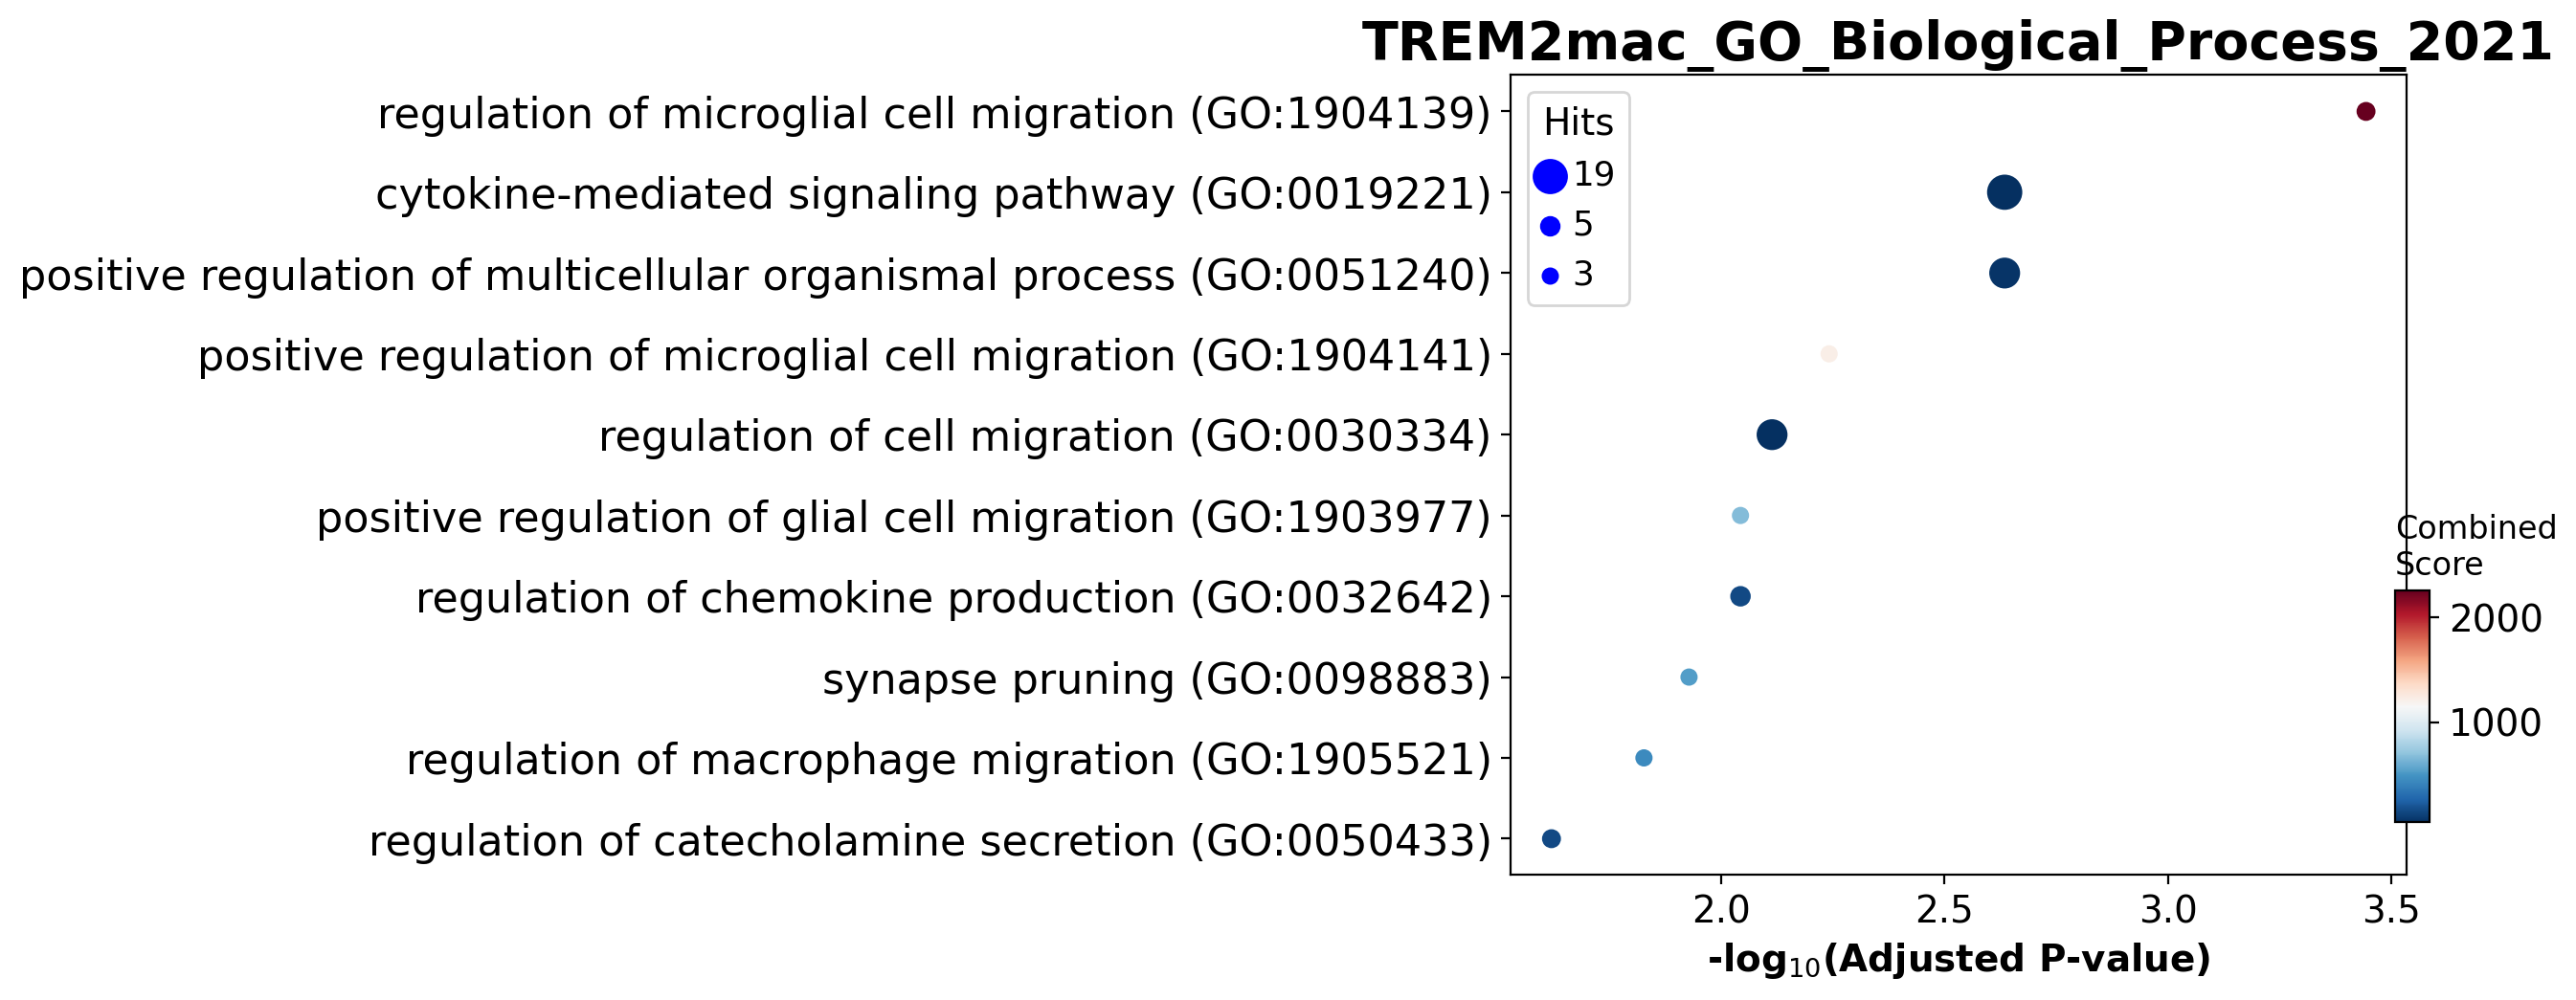

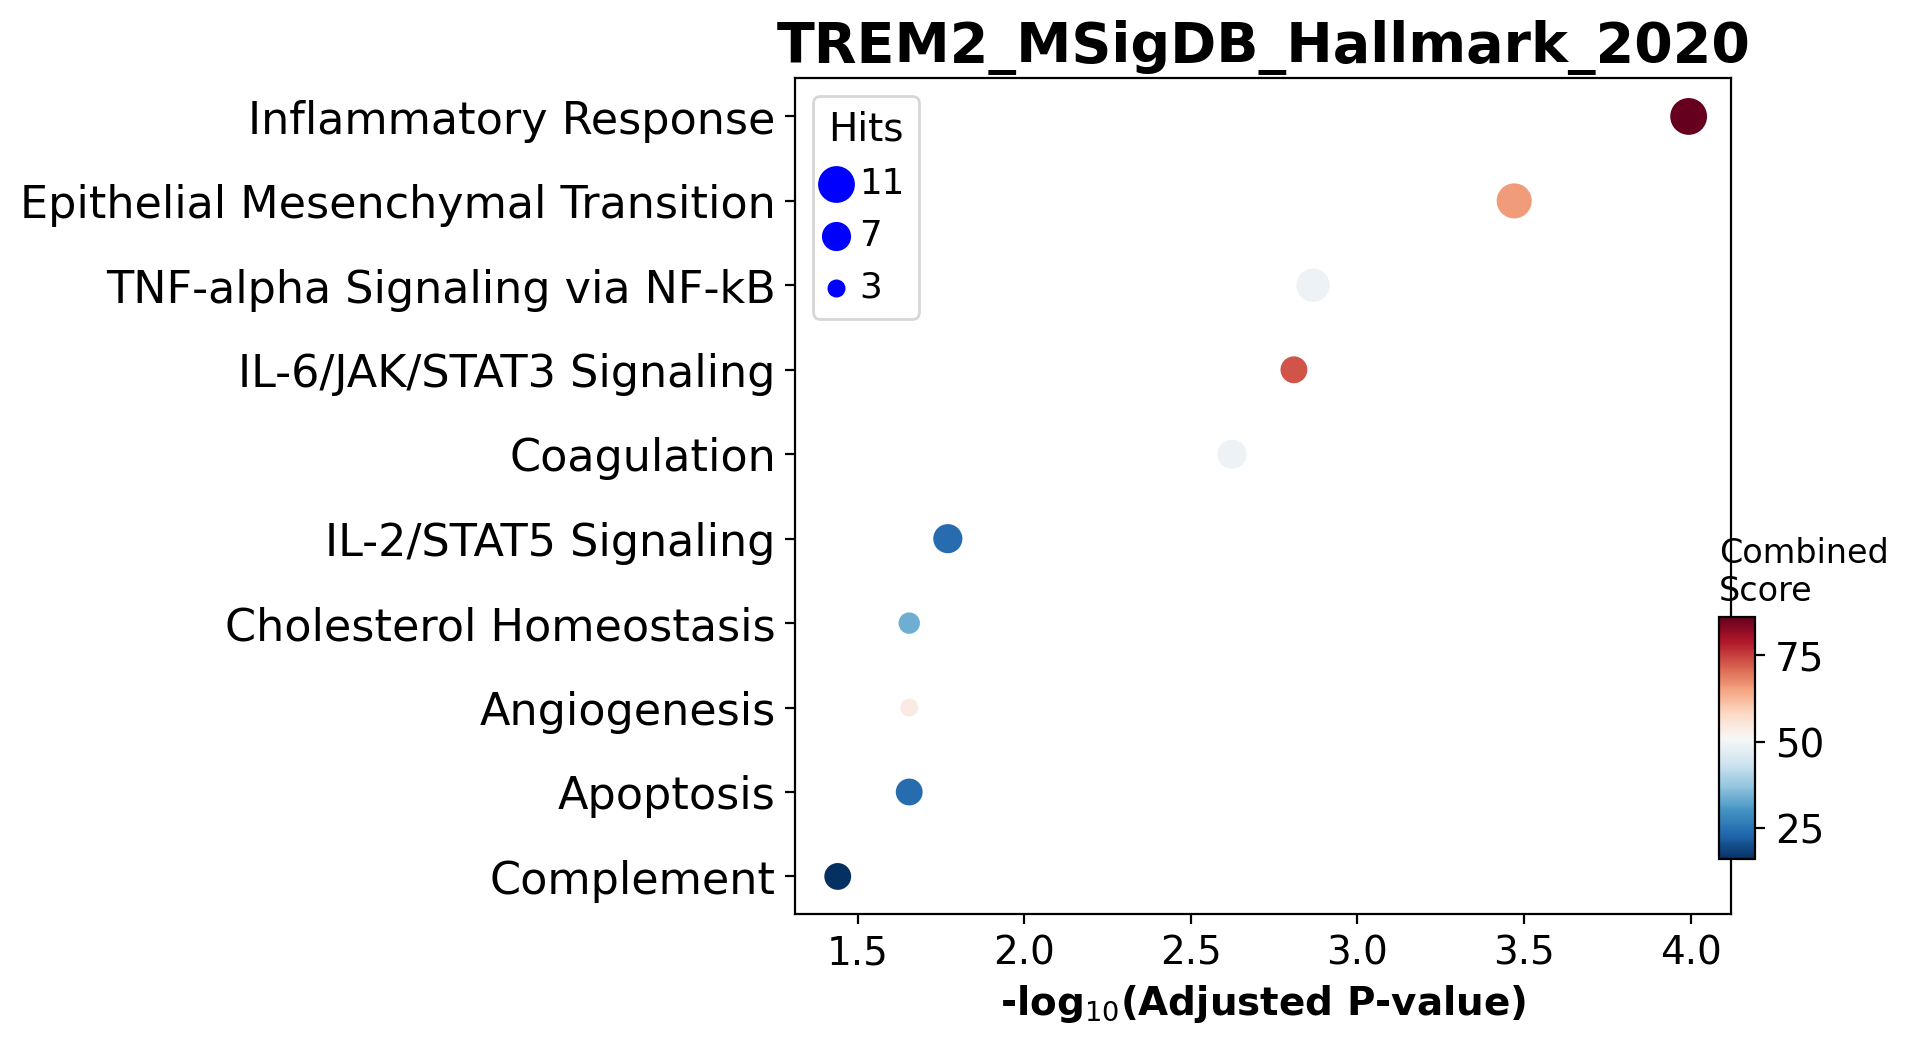

In [352]:
#gp.dotplot(enr_TREM2mac.res2d,title='TREM2mac_GO_Biological_Process_2021',  top_term=10, column='Adjusted P-value')
#gp.dotplot(enr_TREM2mac_Hallmark.res2d,title='TREM2_MSigDB_Hallmark_2020',  top_term=10, column='Adjusted P-value')
#gp.dotplot(enr_Ironmac.res2d,title='Iron-recycling_mac_GO_Biological_Process_2021',  top_term=12, column='Adjusted P-value')
#gp.dotplot(enr_Ironmac_Hallmark.res2d,title='Iron_recycling_mac_MSigDB_Hallmark_2020',  top_term=12, column='Adjusted P-value')

<AxesSubplot:title={'center':'MHCII_mac_MSigDB_Hallmark_2020'}, xlabel='-log$_{10}$(Adjusted P-value)'>

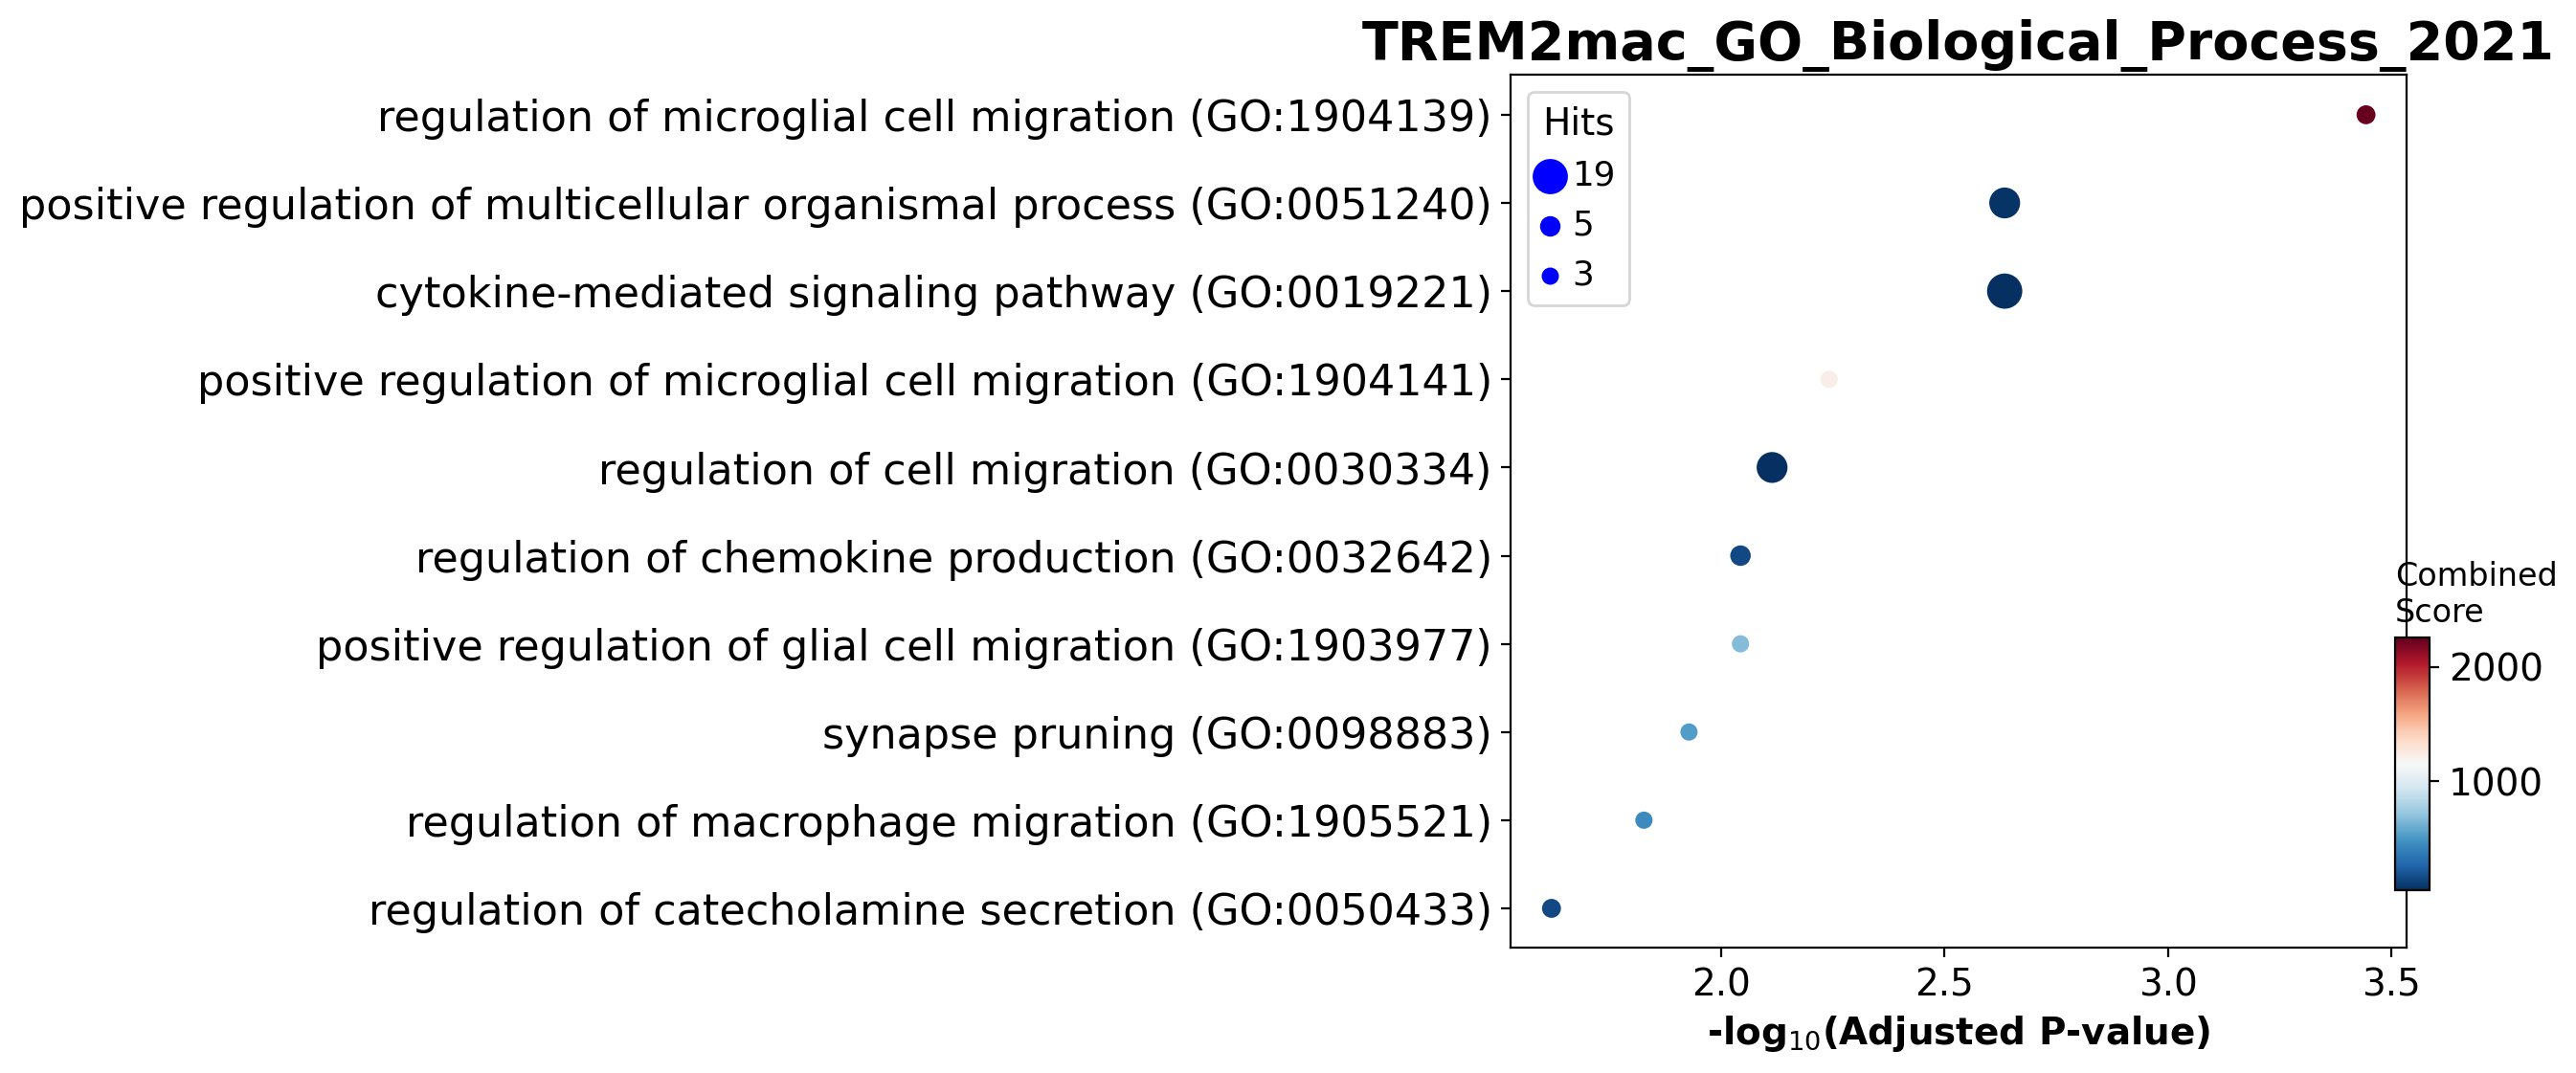

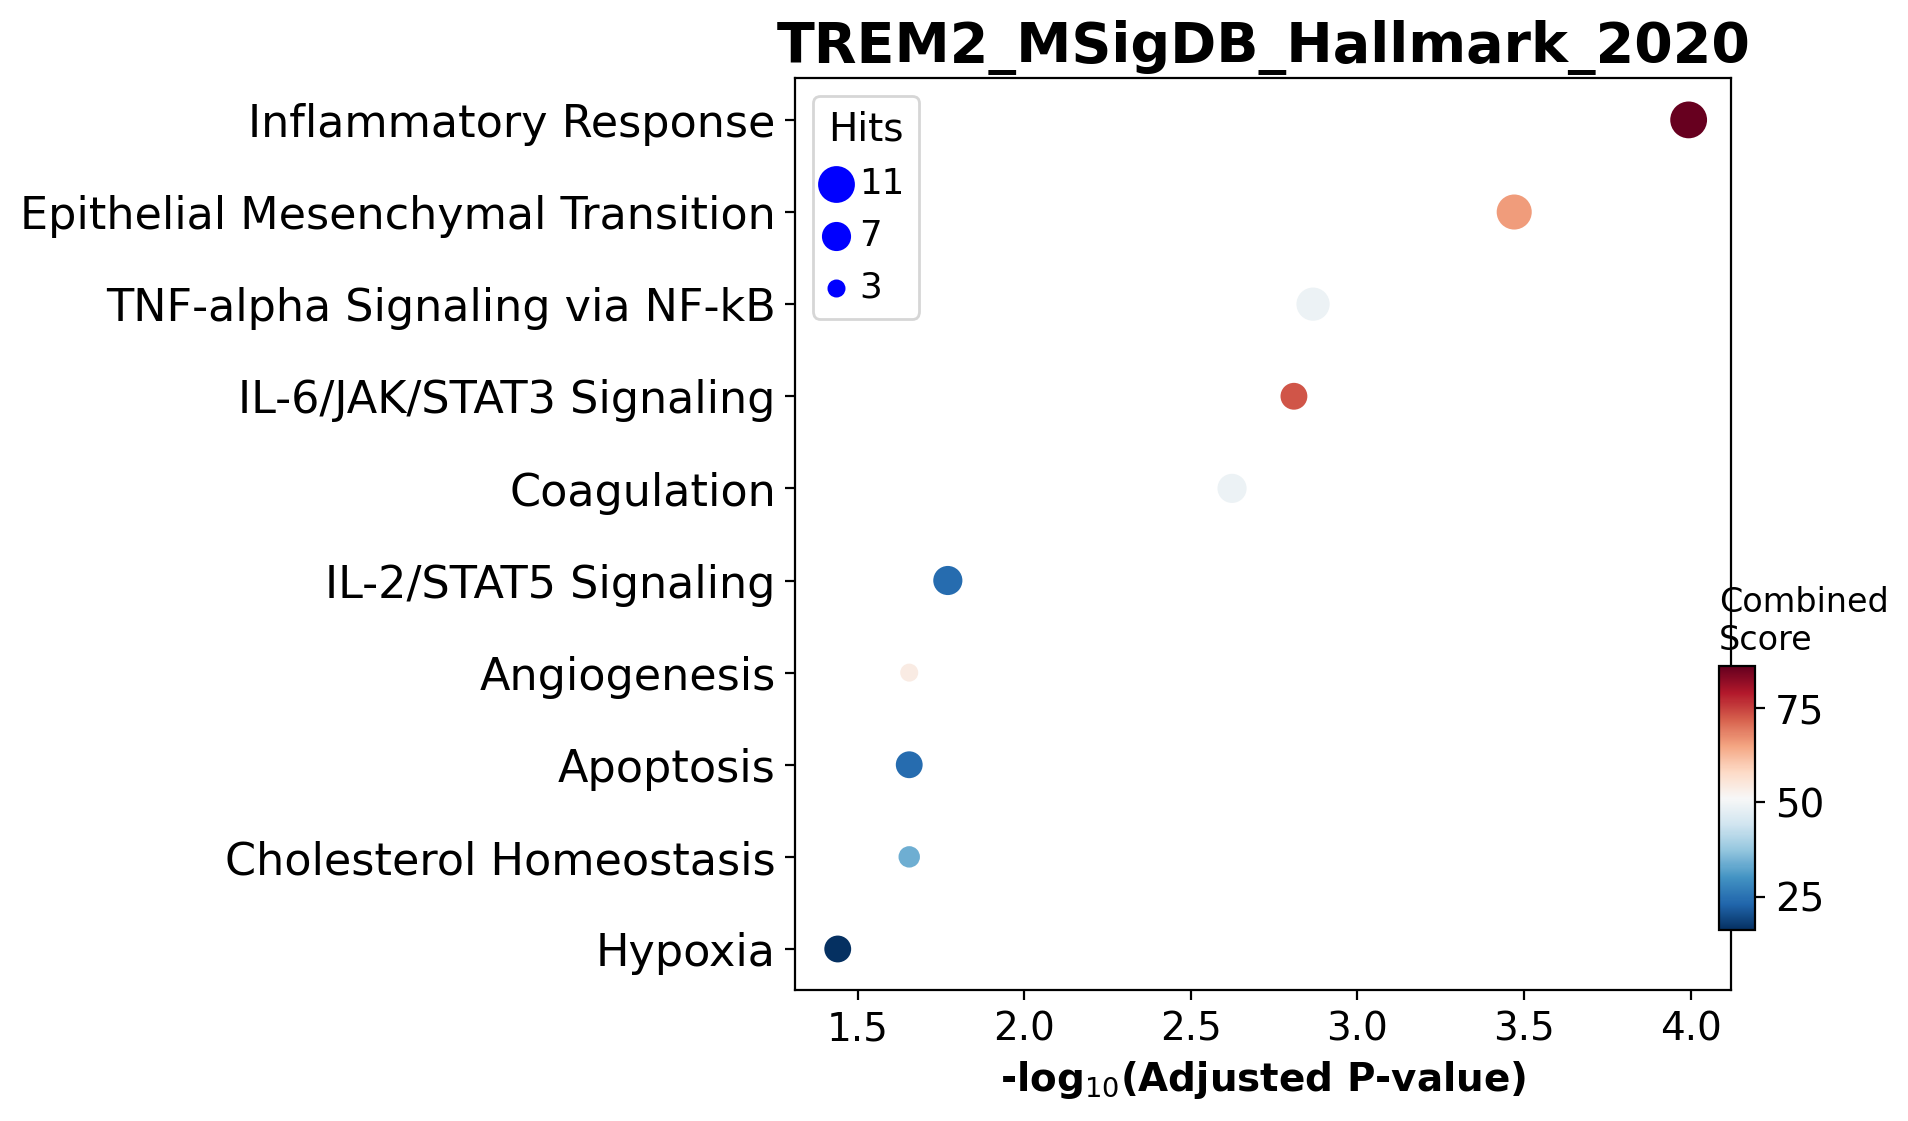

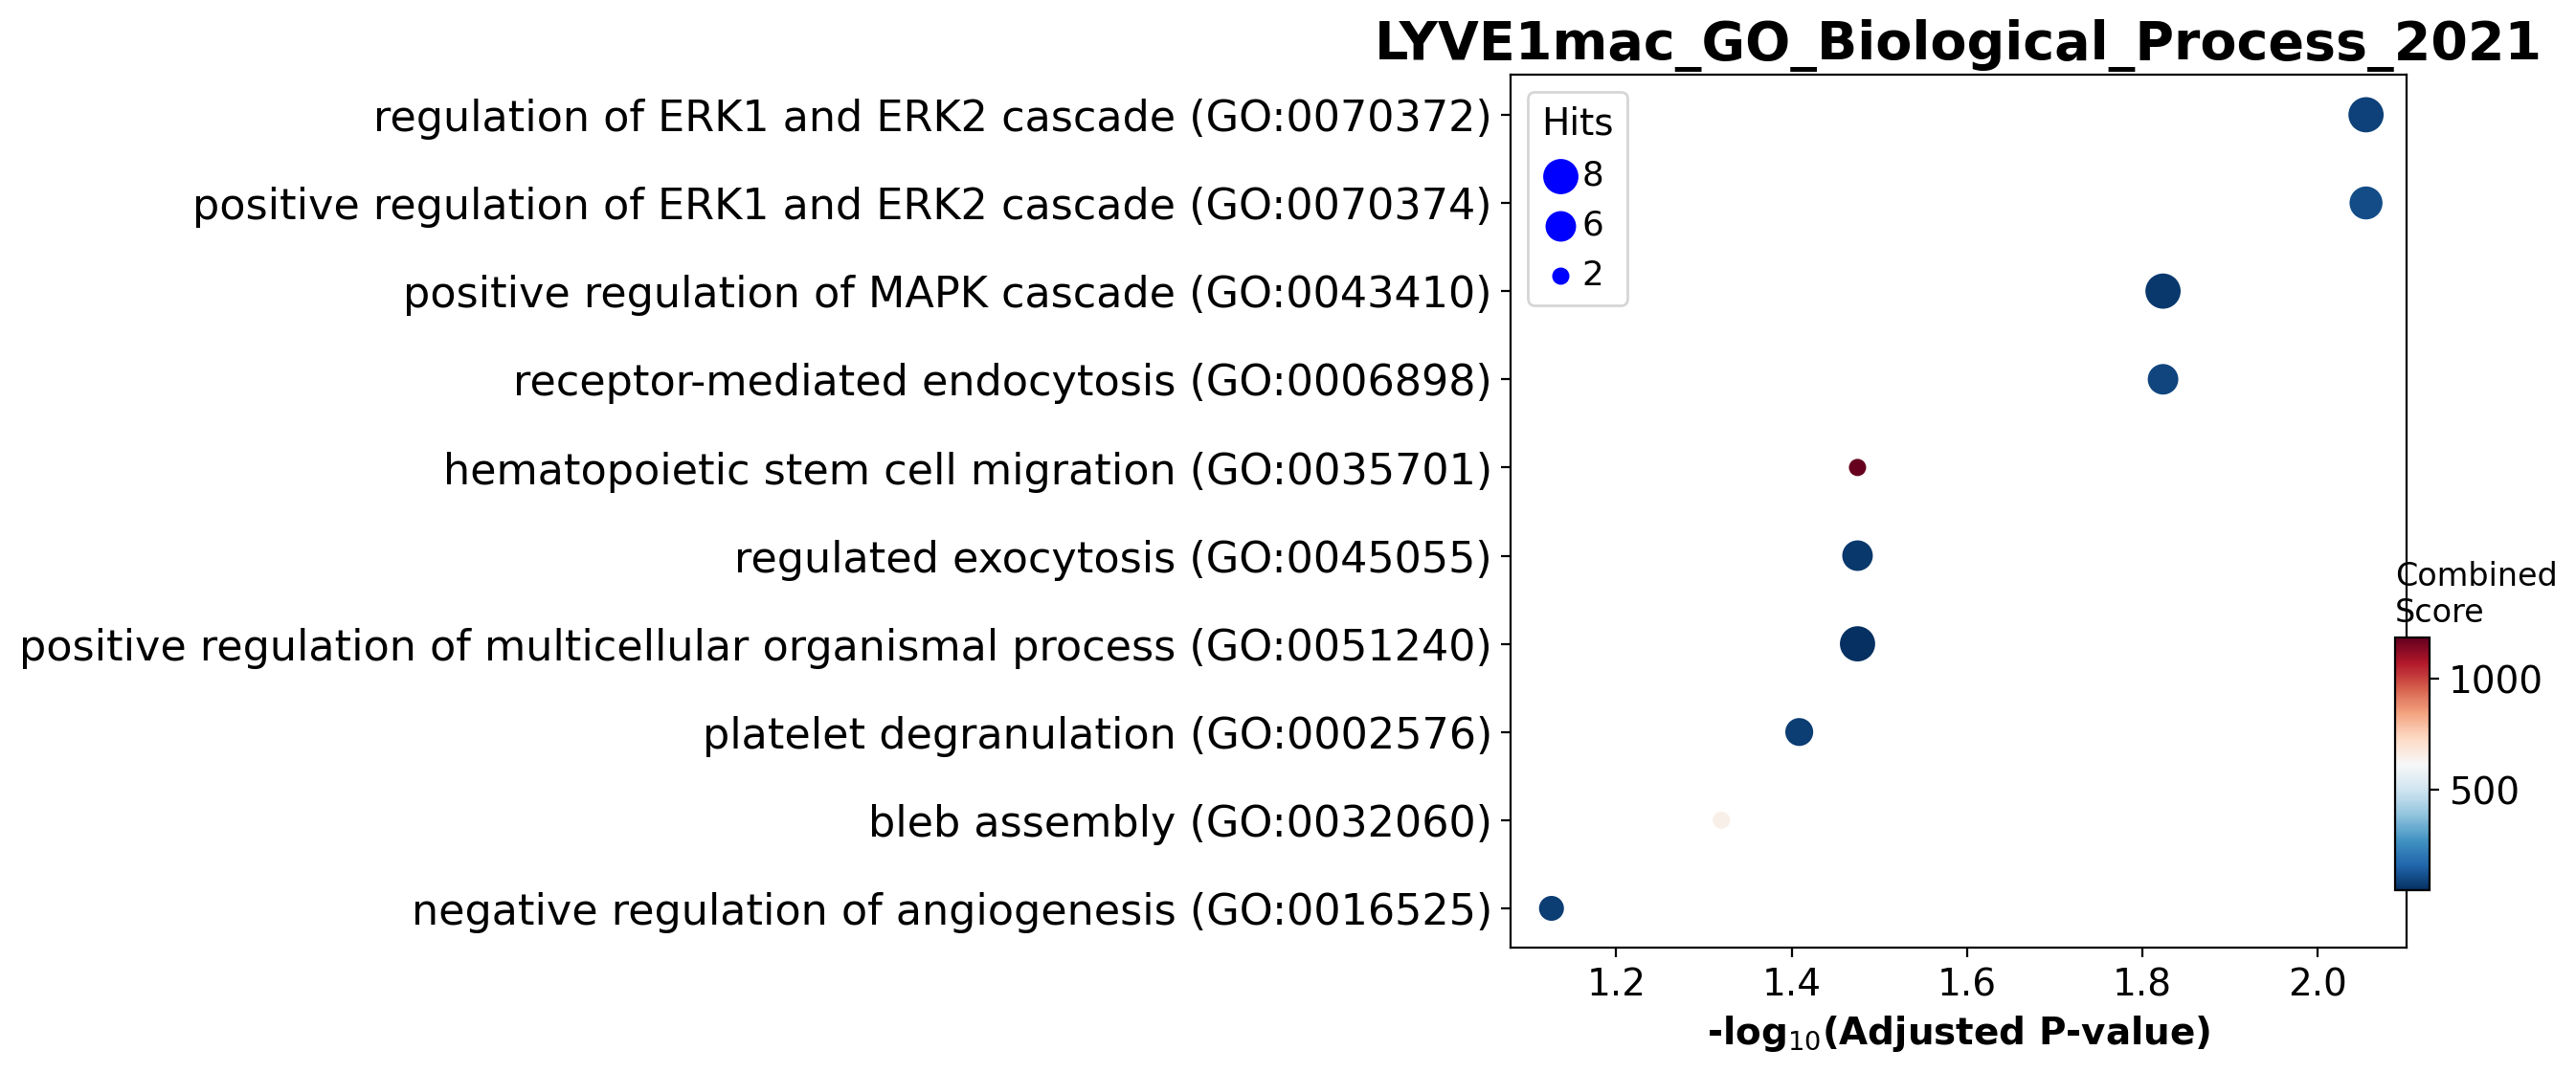

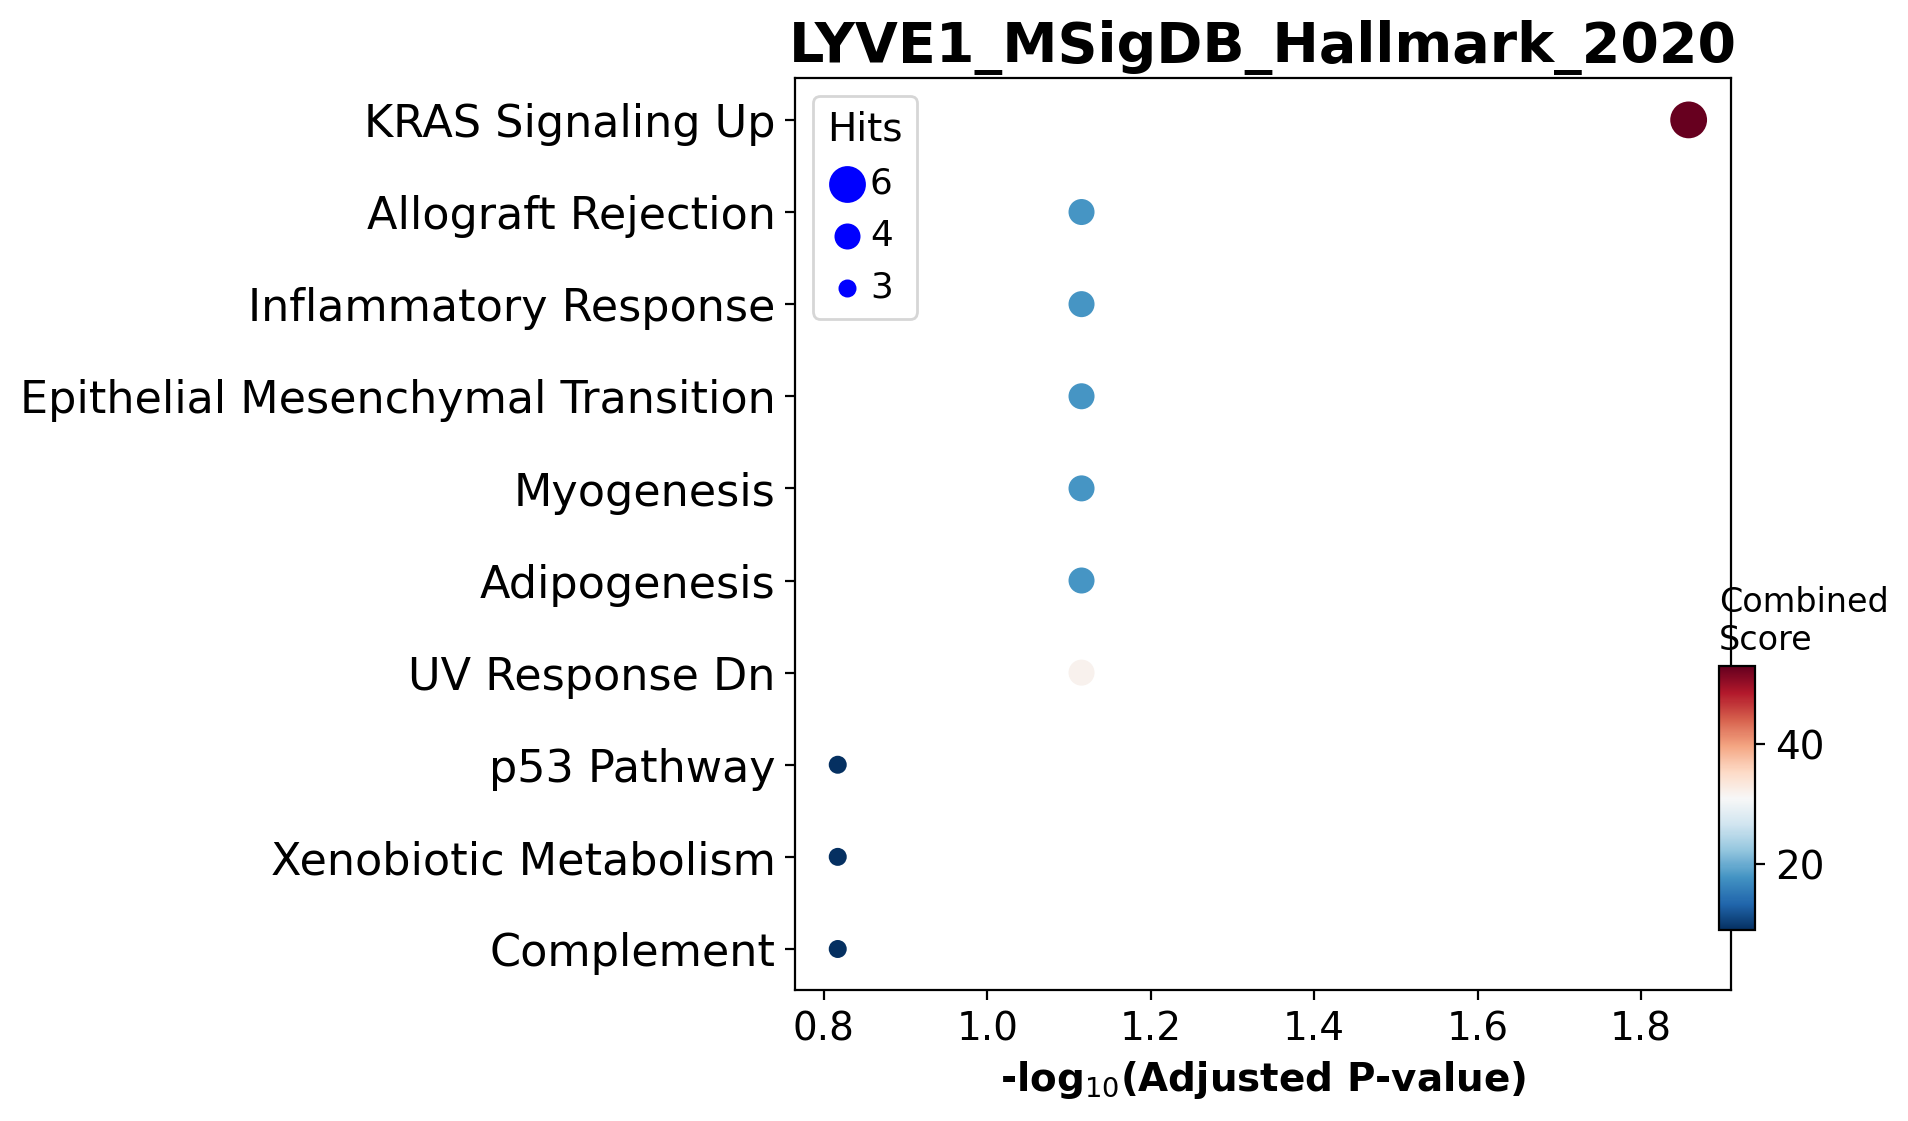

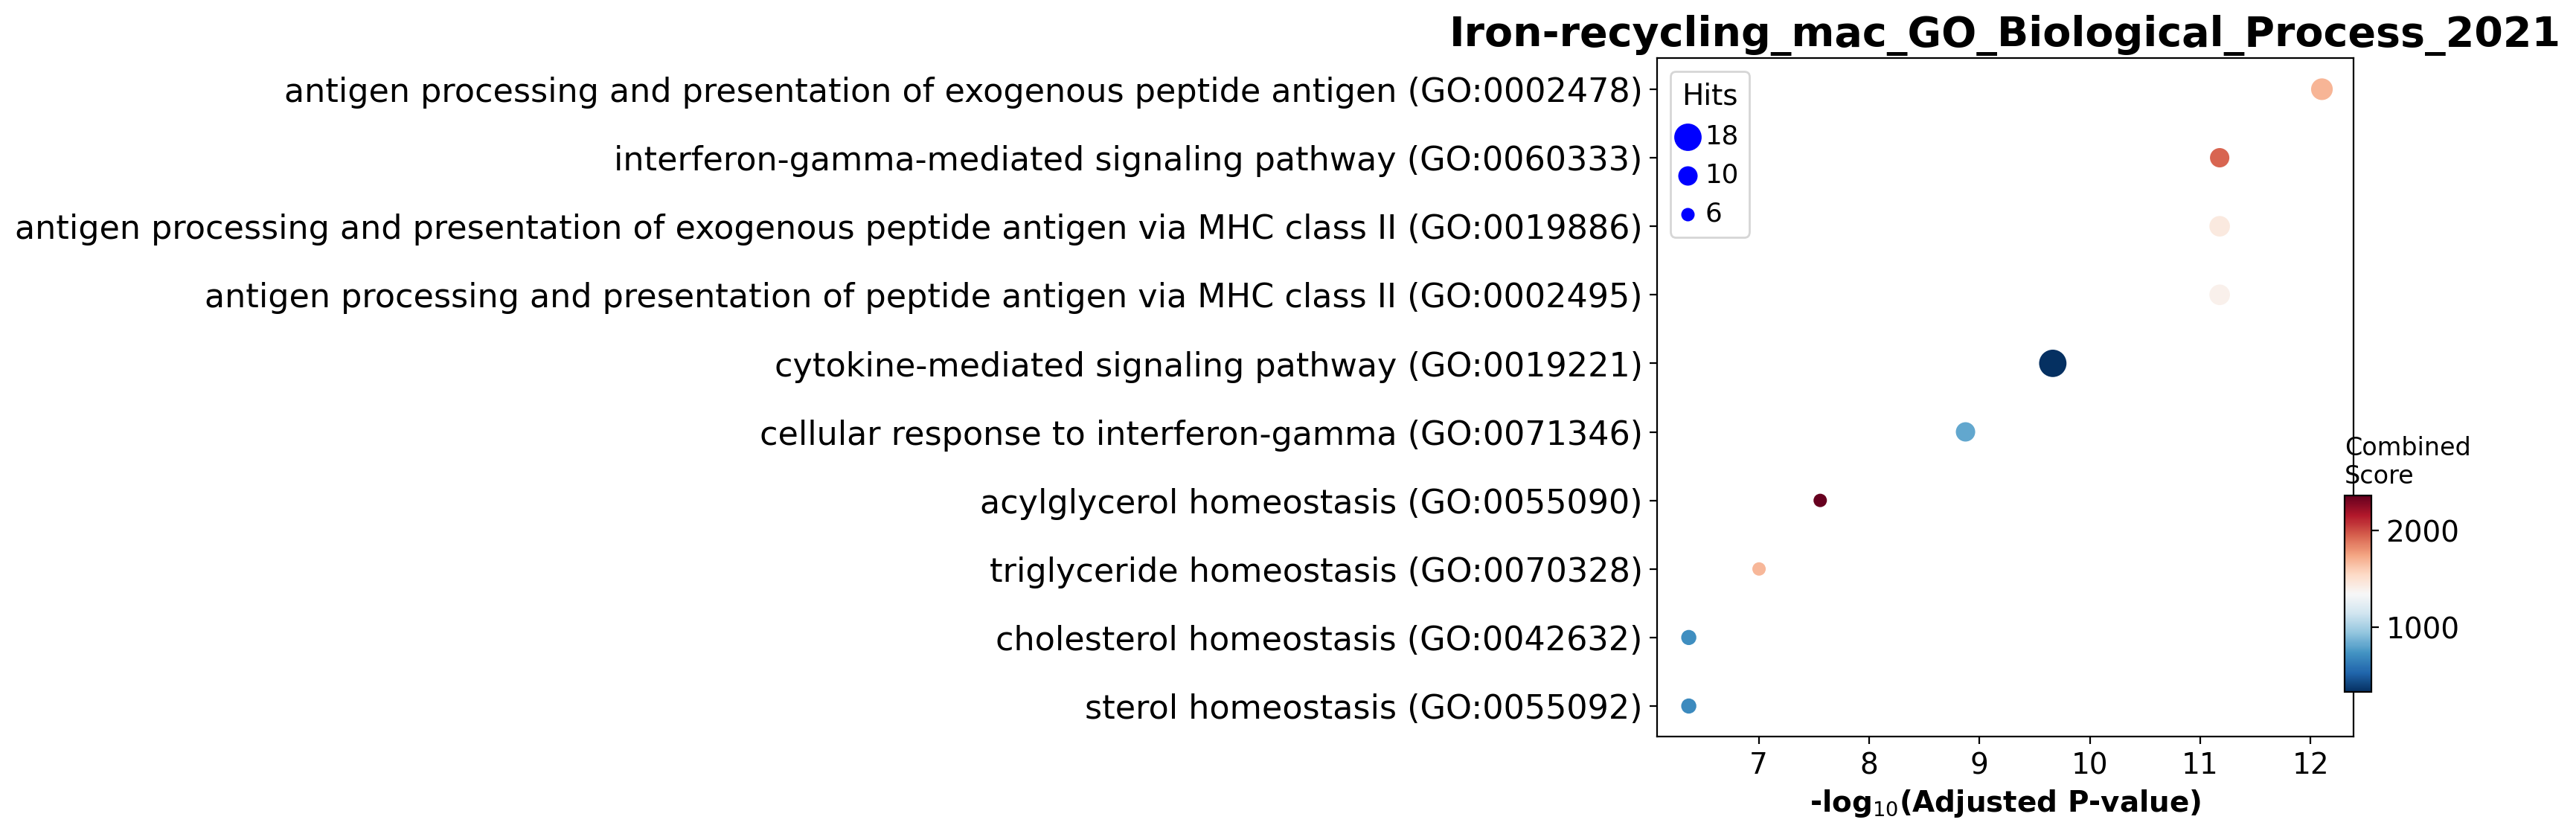

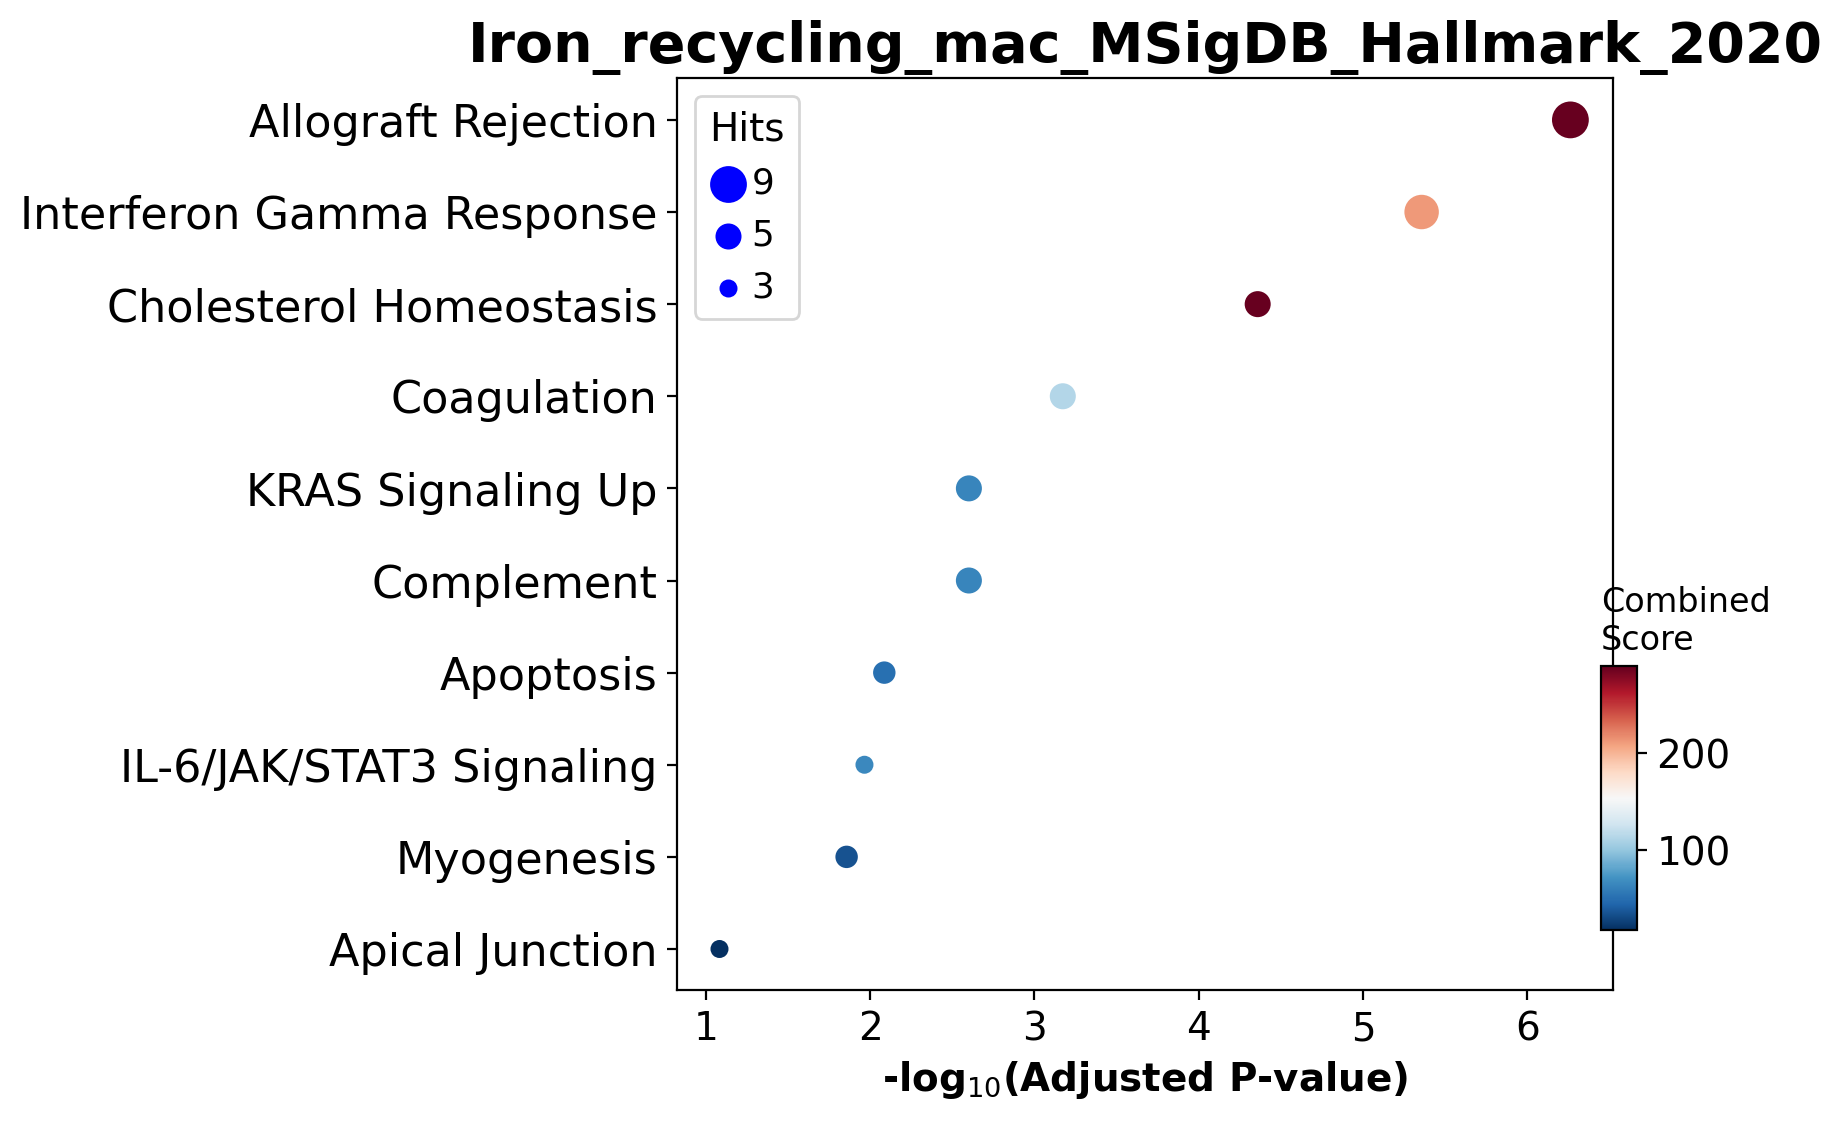

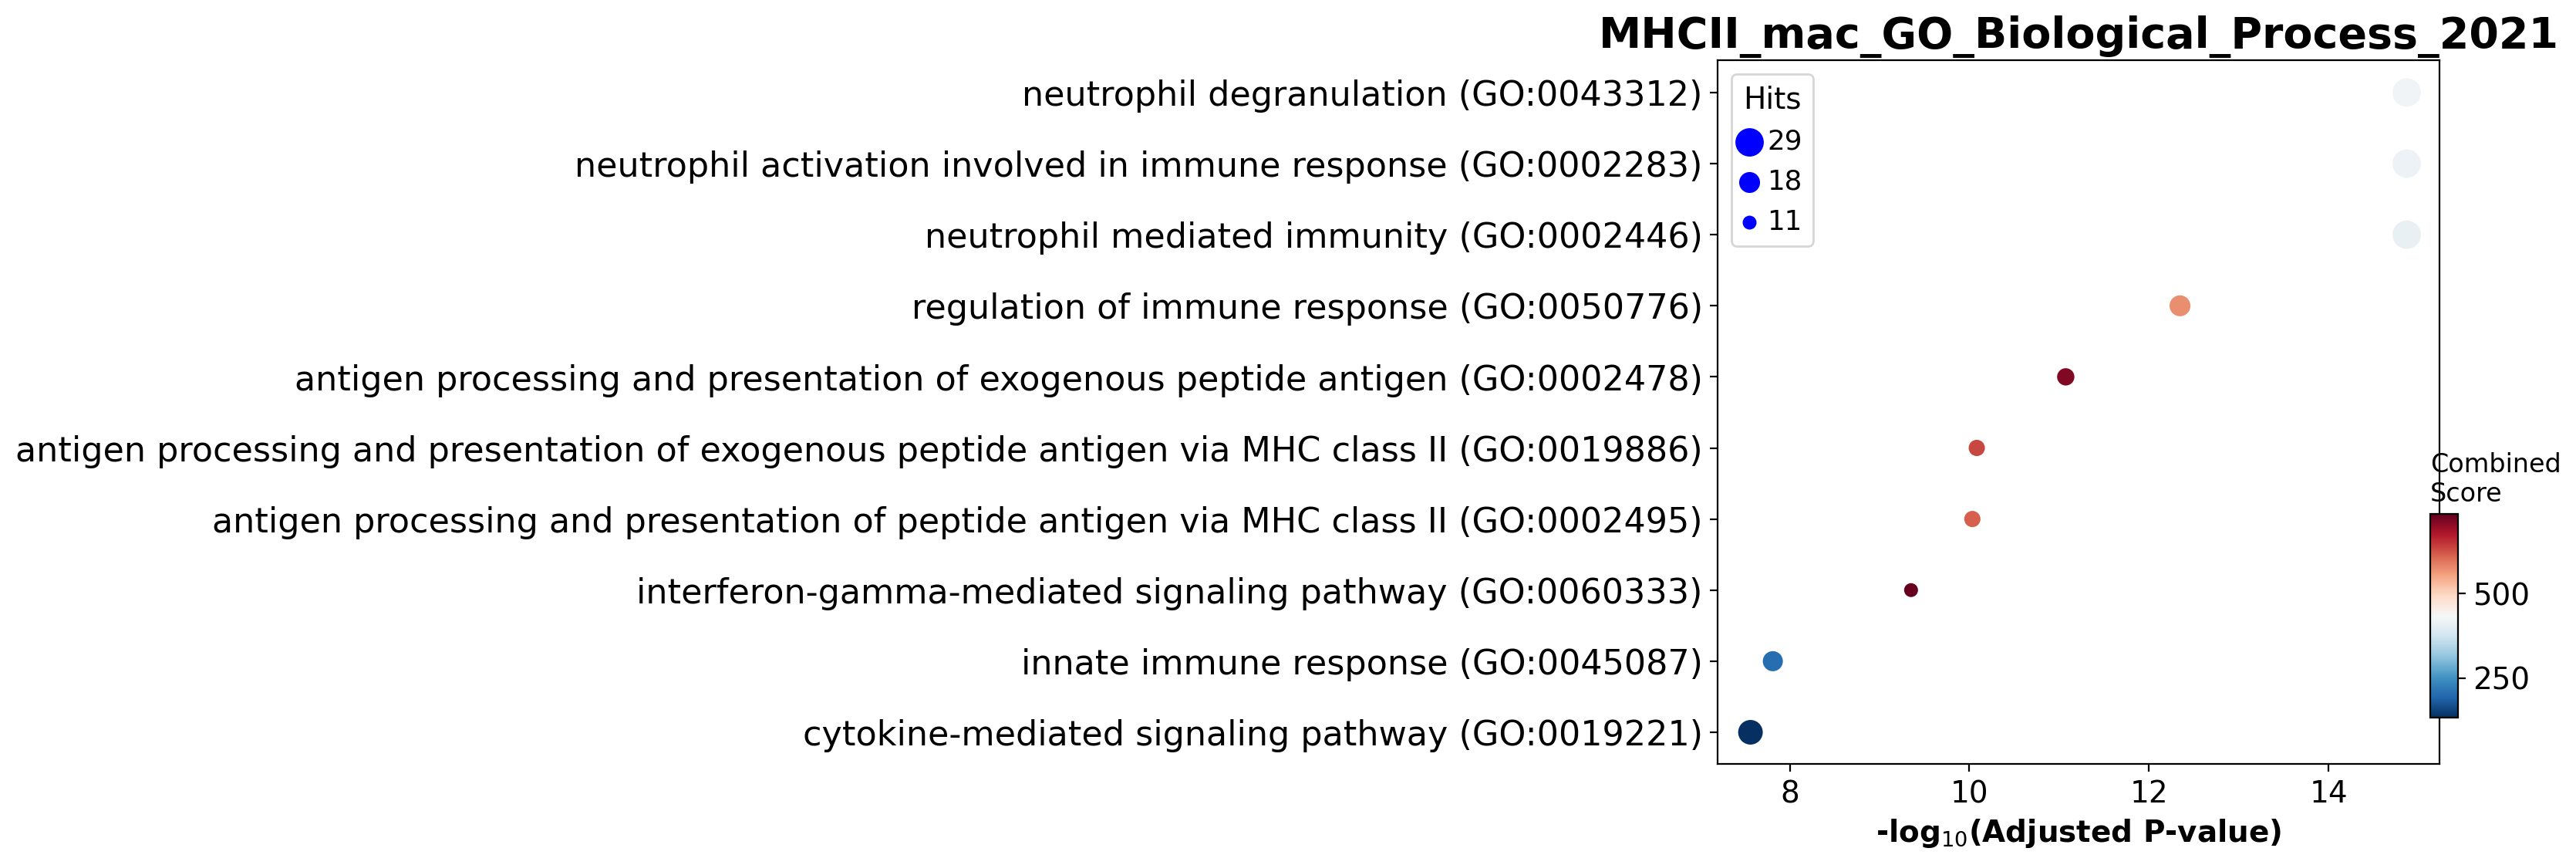

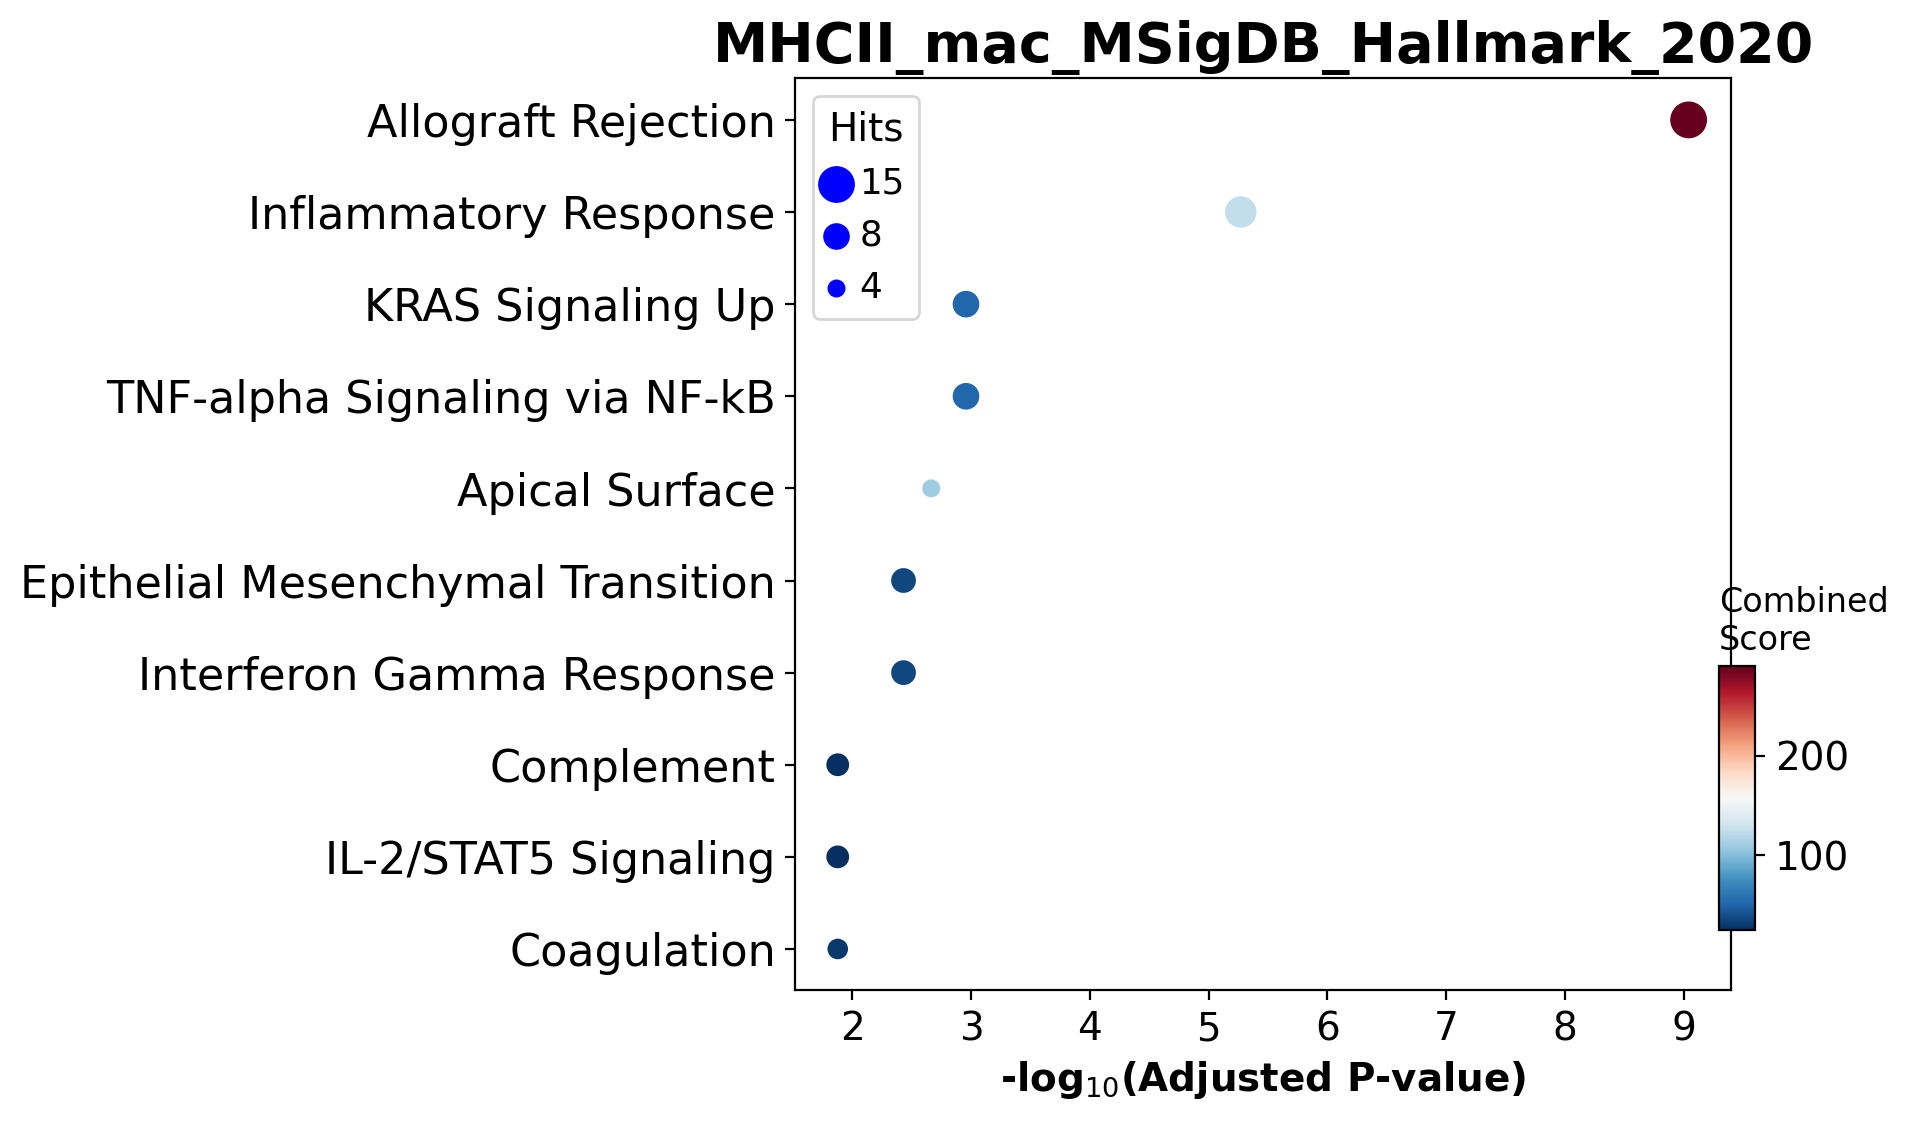

In [38]:
gp.dotplot(enr_TREM2mac.res2d,title='TREM2mac_GO_Biological_Process_2021', cutoff=0.2, top_term=10, figsize=(6,6))
gp.dotplot(enr_TREM2mac_Hallmark.res2d,title='TREM2_MSigDB_Hallmark_2020', cutoff=0.2, top_term=10, figsize=(6,6))
gp.dotplot(enr_LYVE1mac.res2d,title='LYVE1mac_GO_Biological_Process_2021', cutoff=0.2, top_term=10, figsize=(6,6))
gp.dotplot(enr_LYVE1mac_Hallmark.res2d,title='LYVE1_MSigDB_Hallmark_2020', cutoff=0.2, top_term=10, figsize=(6,6))
gp.dotplot(enr_Ironmac.res2d,title='Iron-recycling_mac_GO_Biological_Process_2021', cutoff=0.2, top_term=10, figsize=(6,6))
gp.dotplot(enr_Ironmac_Hallmark.res2d,title='Iron_recycling_mac_MSigDB_Hallmark_2020', cutoff=0.2, top_term=10, figsize=(6,6))
gp.dotplot(enr_MHC2mac.res2d,title='MHCII_mac_GO_Biological_Process_2021', cutoff=0.2, top_term=10, figsize=(6,6))
gp.dotplot(enr_MHC2mac_Hallmark.res2d,title='MHCII_mac_MSigDB_Hallmark_2020', cutoff=0.2, top_term=10, figsize=(6,6))

# TREM2+ mac-related gene expression across prenatal and adult skin macrophages

## Load and configure pooled dataset

In [39]:
#load data object: combined/pooled prenatal skin, adult healthy skin and skin organoid

combined_object = 'pooled_fetal_organoid_adult.processed.h5ad'
combined_path = root_path + combined_object
cdata = sc.read(combined_path)

In [40]:
cdata

AnnData object with n_obs × n_vars = 506107 × 46794
    obs: 'sanger_id', 'chemistry', 'batch', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'day', 'sample_id', 'version', 'week', 'nh3_annot1', 'log1p_n_counts', 'log1p_n_genes', 'n_counts_mito', 'n_counts_ribo', 'n_

In [41]:
#check datasets present
print(list(cdata.obs['dataset'].unique()))

['fetal', 'organoid', 'adult']


In [42]:
#slice to prenetal/fetal skin only and remove genes expressed in <1 cells
keep1 = ['fetal']
cdata_fetal = cdata[cdata.obs['dataset'].isin(keep1)]
sc.pp.filter_genes(cdata_fetal, min_counts=1, min_cells=None, inplace=True)
cdata_fetal

filtered out 18015 genes that are detected in less than 1 counts


Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 186533 × 28779
    obs: 'sanger_id', 'chemistry', 'batch', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'day', 'sample_id', 'version', 'week', 'nh3_annot1', 'log1p_n_counts', 'log1p_n_genes', 'n_counts_mito', 'n_counts_ribo', 'n_

In [43]:
#slice to adult skin only and remove genes expressed in <1 cells
keep2 = ['adult']
cdata_adult = cdata[cdata.obs['dataset'].isin(keep2)]
sc.pp.filter_genes(cdata_adult, min_counts=1, min_cells=None, inplace=True)
cdata_adult

filtered out 18363 genes that are detected in less than 1 counts


Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 195739 × 28431
    obs: 'sanger_id', 'chemistry', 'batch', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'day', 'sample_id', 'version', 'week', 'nh3_annot1', 'log1p_n_counts', 'log1p_n_genes', 'n_counts_mito', 'n_counts_ribo', 'n_

In [44]:
#check prenatal data
cdata_fetal.X.data

array([2.2455943, 0.989481 , 0.989481 , ..., 1.6292564, 1.6292564,
       1.6292564], dtype=float32)

In [45]:
#check adult data
cdata_adult.X.data

array([1.4518068, 0.7372955, 1.157054 , ..., 1.3565243, 2.5281818,
       1.3565243], dtype=float32)

In [46]:
#re concatenate data
import anndata as ad

cdata2 = ad.concat([cdata_fetal, cdata_adult])
cdata2

AnnData object with n_obs × n_vars = 382272 × 19536
    obs: 'sanger_id', 'chemistry', 'batch', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'day', 'sample_id', 'version', 'week', 'nh3_annot1', 'log1p_n_counts', 'log1p_n_genes', 'n_counts_mito', 'n_counts_ribo', 'n_

In [47]:
# check annotations
print(list(cdata2.obs['joint_annotation_20220202'].unique()))

['LYVE1++ macrophage', 'Monocyte (activated/differentiating)', 'Eo/baso/mast cell progenitor', 'DC2', 'TREM2+ macrophage', 'Monocyte precursor', 'Monocyte', 'WNT2+ fibroblast', 'Iron-recycling macrophage', 'NK cell', 'B cell', 'LTi', 'ILC3', 'Inflammatory DC', 'MEMP - Early erythroid', 'CD4 T cell', 'Pro B cell', 'HSC', 'Pre B cell', 'MHCII+ macrophage', 'LE', 'Pre pro B cell', 'Innate T type1', 'CD8 T cell', 'Myocytes', 'pDC', 'Mast cell (most mature)', 'DC1', 'Mast cell (medium)', 'Capillaries', 'Neutrophil2', 'Capillary arterioles', 'LC', 'Megakaryocyte', 'MEMP - Megak', 'Mast cell (earliest)', 'Erythroid (fetal)', 'Myoblasts', 'Myofibroblasts', 'Pre-dermal condensate', 'HOXC5+ early fibroblast', 'PEAR1+ fibroblast', 'Pericytes', 'FRZB+ early fibroblast', 'Early erythroid (embryonic)', 'Early myocytes', 'Neuron progenitors', 'Myelinating Schwann cells', 'Schwann/Schwann precursors', 'LMCD1+ mural cell', 'PLN+ mural cell', 'ILC2', 'Lymphoid progenitor', 'SPP1+ proliferating neuron pr

In [48]:
print(list(cdata2.obs['final'].unique()))

['nan', 'c7', 'c4', 'c6', 'C_Melanocyte', 'c3', 'c8', 'c1', 'c2', 'c5', 'LE2', 'F2', 'LE1', 'F1', 'LC_2', 'Th', 'F3', 'VE1', 'VE2', 'LC_3', 'Tc', 'LC_1', 'Treg', 'NK', 'Macro_1', 'ILC1_NK', 'ILC2_3', 'LC_4', 'ILC1', 'Macro_2', 'Plasma', 'DC2', 'Inf_mono', 'Mono', 'moDC_3', 'moDC_1', 'moDC_2', 'MigDC', 'DC1', 'Pericyte_1_non_inflamm', 'Pericyte_2_inflamm', 'Schwaan_2_non_myelinating', 'VE3', 'Schwaan_1_Stroma_Schwan_myelinating', 'M_A_Mast_cell']


In [49]:
#create combined annotation column
cdata2.obs['new_combined_anno'] = cdata2.obs['joint_annotation_20220202']
cond = (cdata2.obs['new_combined_anno'] == 'nan')
cdata2.obs.loc[cond, 'new_combined_anno'] = cdata2.obs['final']
print(list(cdata2.obs['new_combined_anno'].unique()))

['LYVE1++ macrophage', 'Monocyte (activated/differentiating)', 'Eo/baso/mast cell progenitor', 'DC2', 'TREM2+ macrophage', 'Monocyte precursor', 'Monocyte', 'WNT2+ fibroblast', 'Iron-recycling macrophage', 'NK cell', 'B cell', 'LTi', 'ILC3', 'Inflammatory DC', 'MEMP - Early erythroid', 'CD4 T cell', 'Pro B cell', 'HSC', 'Pre B cell', 'MHCII+ macrophage', 'LE', 'Pre pro B cell', 'Innate T type1', 'CD8 T cell', 'Myocytes', 'pDC', 'Mast cell (most mature)', 'DC1', 'Mast cell (medium)', 'Capillaries', 'Neutrophil2', 'Capillary arterioles', 'LC', 'Megakaryocyte', 'MEMP - Megak', 'Mast cell (earliest)', 'Erythroid (fetal)', 'Myoblasts', 'Myofibroblasts', 'Pre-dermal condensate', 'HOXC5+ early fibroblast', 'PEAR1+ fibroblast', 'Pericytes', 'FRZB+ early fibroblast', 'Early erythroid (embryonic)', 'Early myocytes', 'Neuron progenitors', 'Myelinating Schwann cells', 'Schwann/Schwann precursors', 'LMCD1+ mural cell', 'PLN+ mural cell', 'ILC2', 'Lymphoid progenitor', 'SPP1+ proliferating neuron pr

In [50]:
#keep only macrophage celltypes from both datasets
c_macs=['LYVE1++ macrophage',  'TREM2+ macrophage', 'Iron-recycling macrophage', 'MHCII+ macrophage',  'Macro_1', 'Macro_2']
cdata2_maccombined = cdata2[cdata2.obs['new_combined_anno'].isin(c_macs)]
cdata2_maccombined

View of AnnData object with n_obs × n_vars = 31597 × 19536
    obs: 'sanger_id', 'chemistry', 'batch', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'day', 'sample_id', 'version', 'week', 'nh3_annot1', 'log1p_n_counts', 'log1p_n_genes', 'n_counts_mito', 'n_counts_rib

In [51]:
print(list(cdata2_maccombined.obs['dataset'].unique()))

['fetal', 'adult']


In [52]:
#reorder cell types
cdata2_maccombined.obs['new_combined_anno'] = cdata2_maccombined.obs['new_combined_anno'].astype('category')
cdata2_maccombined.obs['new_combined_anno'] = cdata2_maccombined.obs['new_combined_anno'].cat.reorder_categories([
'Iron-recycling macrophage', 
'LYVE1++ macrophage', 
'MHCII+ macrophage', 
'TREM2+ macrophage',
'Macro_1', 
'Macro_2'])

Trying to set attribute `.obs` of view, copying.


## Plotting by celltype

In [53]:
#Genes contributing to TREM2+ mac functional profile from GSEApy analysis identified
#Dictionary of genes and corresponding GSEApy function produced

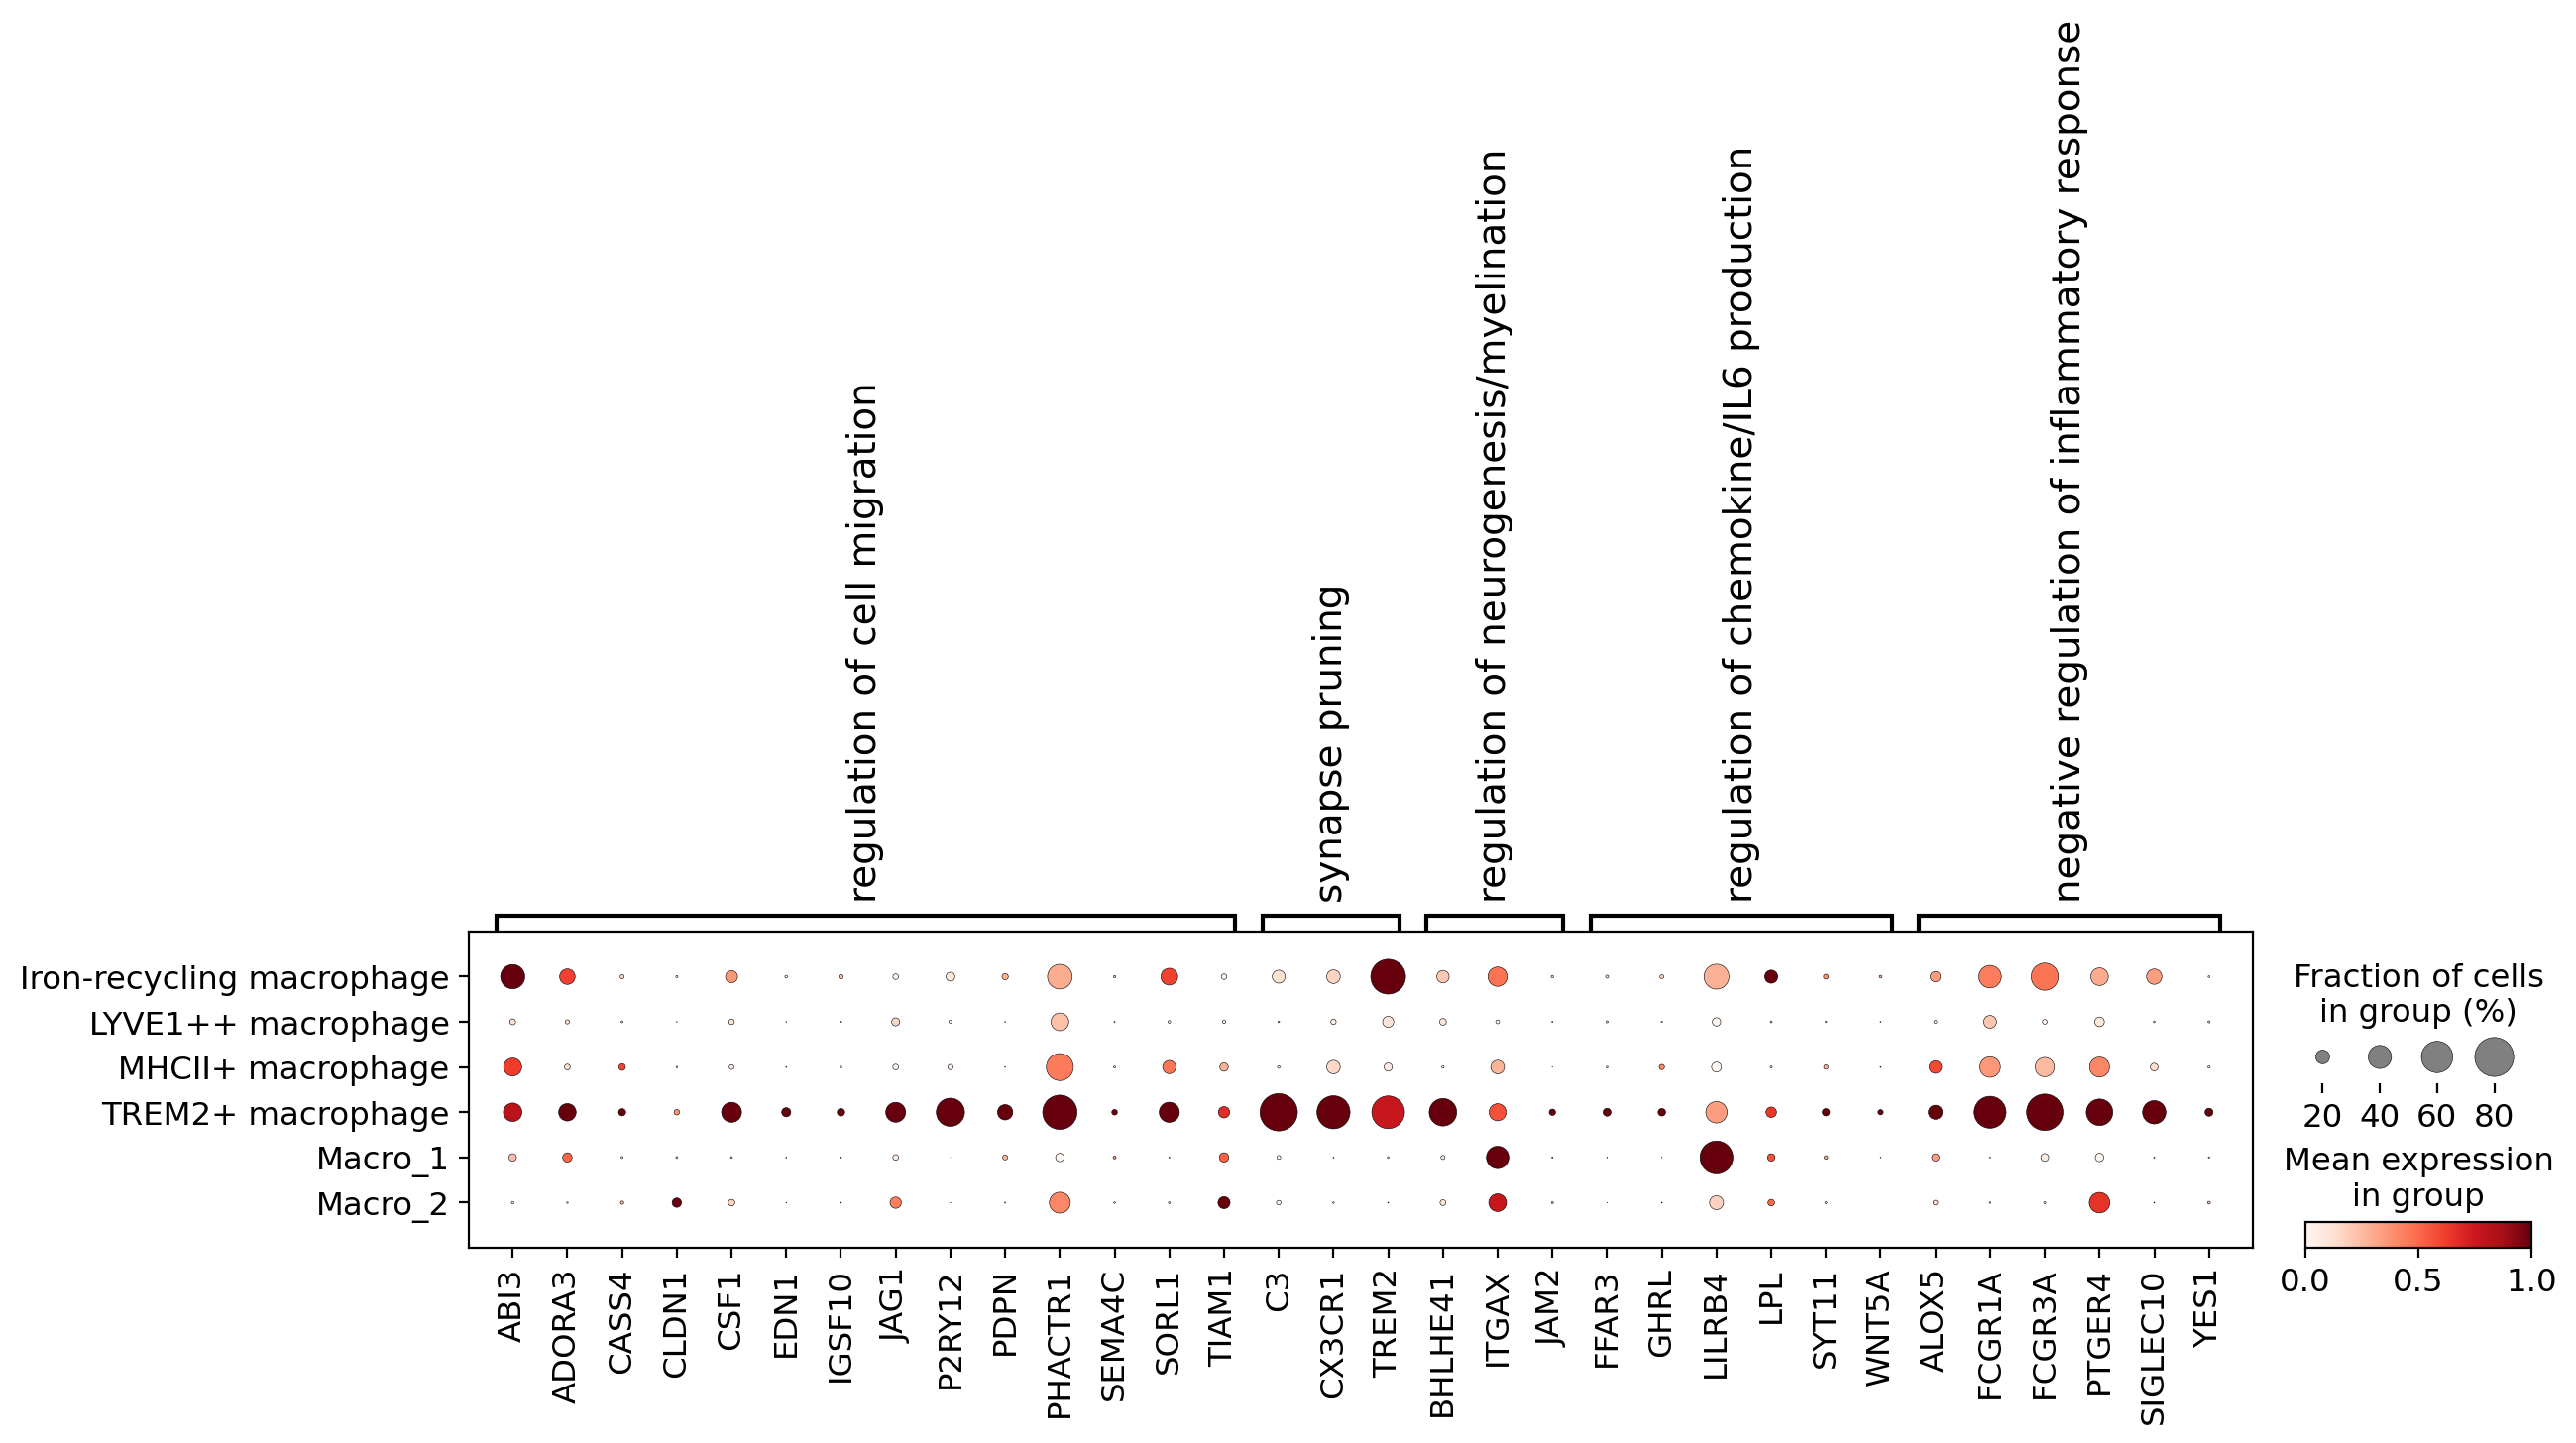

In [55]:
markers = {'regulation of cell migration' : ['ABI3', 'ADORA3', 'CASS4', 'CLDN1', 'CSF1', 'EDN1', 'IGSF10', 'JAG1', 'P2RY12', 'PDPN', 'PHACTR1', 'SEMA4C', 'SORL1', 'TIAM1'],
          'synapse pruning' : ['C3', 'CX3CR1', 'TREM2'],
           'regulation of neurogenesis/myelination' : ['BHLHE41', 'ITGAX', 'JAM2'],
          'regulation of chemokine/IL6 production' : ['FFAR3', 'GHRL', 'LILRB4', 'LPL', 'SYT11', 'WNT5A'],
          'negative regulation of inflammatory response' : ['ALOX5', 'FCGR1A', 'FCGR3A', 'PTGER4', 'SIGLEC10', 'YES1']}
sc.pl.dotplot(cdata2_maccombined, var_names= markers, groupby=['new_combined_anno'], standard_scale='var')
#return_fig=True).savefig('/home/jovyan/projects/skin/fetal_skin/figures/mac_TREM2_24052022.pdf')

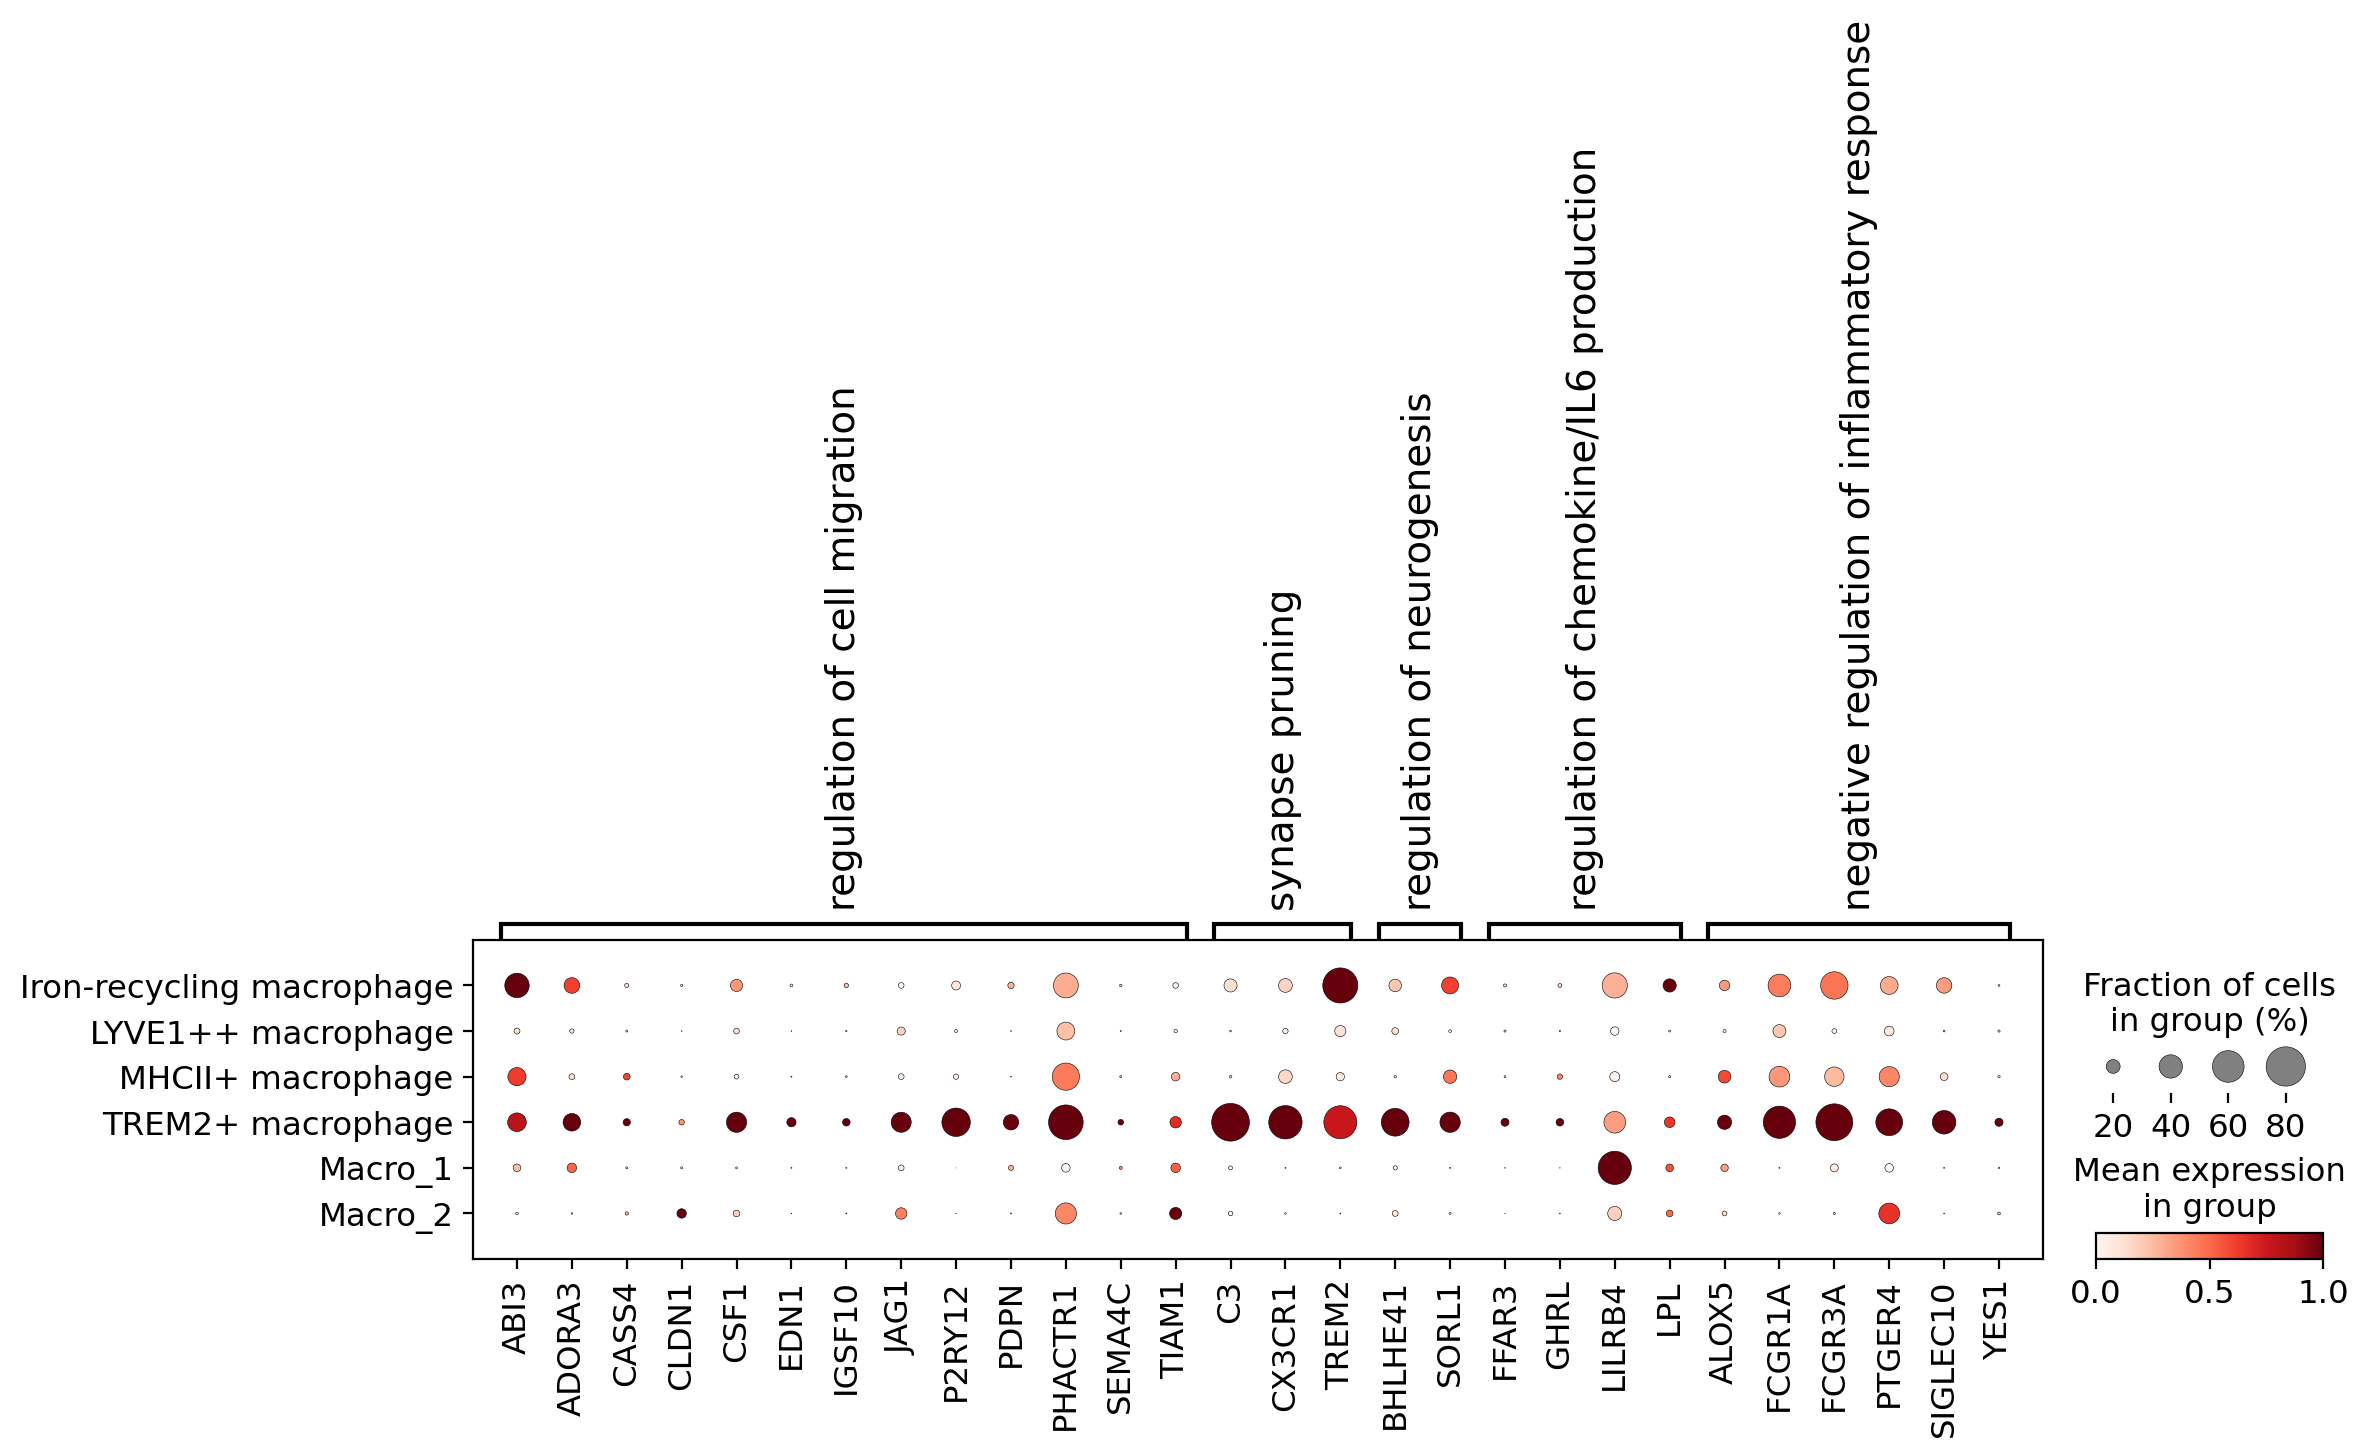

In [56]:
#markers = {'regulation of cell migration' : ['ABI3', 'ADORA3', 'CASS4', 'CLDN1', 'CSF1', 'EDN1', 'IGSF10', 'JAG1', 'P2RY12', 'PDPN', 'PHACTR1', 'SEMA4C', 'TIAM1'],
#          'synapse pruning' : ['C3', 'CX3CR1', 'TREM2'],
#           'regulation of neurogenesis' : ['BHLHE41', 'SORL1'],
#          'regulation of chemokine/IL6 production' : ['FFAR3', 'GHRL', 'LILRB4', 'LPL'],
#          'negative regulation of inflammatory response' : ['ALOX5', 'FCGR1A', 'FCGR3A', 'PTGER4', 'SIGLEC10', 'YES1']}
#sc.pl.dotplot(cdata2_maccombined, var_names= markers, groupby=['new_combined_anno'], standard_scale='var')
##return_fig=True).savefig('/home/jovyan/projects/skin/fetal_skin/figures/mac_TREM2_24052022.pdf')